In [ ]:
import os
from zipfile import ZipFile
import pandas
import csv
import matplotlib.pyplot as plt

# zip_files_path = r"C:\Users\sueli\OneDrive\Área de Trabalho\accidents-data"
# allDataSP_path = r"C:\Users\sueli\OneDrive\Área de Trabalho\allDataSP.csv"
# accidentsByDay_path = r"C:\Users\sueli\OneDrive\Área de Trabalho\accidentsByDay.csv"
# holidays_path = r"C:\Users\sueli\OneDrive\Área de Trabalho\holidaysSP.csv"
zip_files_path = r"C:\Users\henri\Desktop\accidents-data"
allDataSP_path = r"C:\Users\henri\Desktop\allDataSP.csv"
accidentsByDay_path = r"C:\Users\henri\Desktop\accidentsByDay.csv"
holidays_path = r"C:\Users\henri\Desktop\holidaysSP.csv"

columns = ['ano_acidente', 'mes_acidente', 'dia_acidente', 'dia_semana', 'data_acidente']
col_types = {
    'num_acidente': 'int64',
    'chv_localidade': 'string',
    'data_acidente': 'string',
    'uf_acidente': 'string',
    'ano_acidente': 'int64',
    'mes_acidente': 'int64',
    'dia_acidente': 'int64',
    'mes_ano_acidente': 'string',
    'codigo_ibge': 'int64',
    'dia_semana': 'string',
    'fase_dia': 'string',
    'tp_acidente': 'string',
    'cond_meteorologica': 'string',
    'end_acidente': 'string',
    'num_end_acidente': 'string',
    'cep_acidente': 'string',
    'bairro_acidente': 'string',
    'km_via_acidente': 'string',
    'latitude_acidente': 'float64',
    'longitude_acidente': 'float64',
    'hora_acidente': 'string',
    'tp_rodovia': 'string',
    'cond_pista': 'string',
    'tp_cruzamento': 'string',
    'tp_pavimento': 'string',
    'tp_curva': 'string',
    'lim_velocidade': 'string',
    'tp_pista': 'string',
    'ind_guardrail': 'string',
    'ind_cantcentral': 'string',
    'ind_acostamento': 'string',
    'qtde_acidente': 'int64',
    'qtde_acid_com_obitos': 'int64',
    'qtde_envolvidos': 'int64',
    'qtde_feridosilesos': 'int64',
    'qtde_obitos': 'int64'
}

In [ ]:
if os.path.exists(allDataSP_path):
    os.remove(allDataSP_path)
    print(f'O arquivo {allDataSP_path} foi excluído.')
else:
    print(f'O arquivo {allDataSP_path} não existe.')

with open(allDataSP_path, mode='w', newline='', encoding='utf-8') as arquivo:
    escritor = csv.writer(arquivo)  # Usando ponto e vírgula como delimitador
    escritor.writerow(columns)  # Escrevendo todas as linhas de dados

print(f'Arquivo {allDataSP_path} criado com sucesso!')

for file in os.listdir(zip_files_path): # para cada pasta zipada
  with ZipFile(zip_files_path + r"\\" + file, 'r') as zip_file:
    csvs_list = zip_file.namelist()
    print("Lista dos arquivos dentro do zip: " + str(csvs_list))
    accidents_data = [f for f in csvs_list if f.startswith('Acidentes')][0]
    print("Arquivo: " + accidents_data)

    accidentes_openData = pandas.read_csv(zip_file.open(accidents_data), delimiter=';', dtype=col_types, encoding='utf-8')
    print("Linhas e colunas csv inteiro: " + str(accidentes_openData.shape))

    accidentes_openData = accidentes_openData.drop(accidentes_openData[accidentes_openData['uf_acidente'] != 'SP'].index)
    accidentes_openData = accidentes_openData[accidentes_openData['data_acidente'] >= '2019-07-01']
    accidentes_openData['dia_acidente'] = accidentes_openData['data_acidente'].apply(lambda x: x[-2:])
    accidentes_openData = accidentes_openData[columns]

    print("Linhas e colunas csv filtrado: " + str(accidentes_openData.shape))

    accidentes_openData.info() # fornece informações sobre o DataFrame
    accidentes_openData.head() # retorna as primeiras 5 linhas de 'data_train', dando uma rápida visão geral dos dados.
    accidentes_openData.describe() # fornece estatísticas descritivas sobre as colunas numéricas do DataFrame 'data_train'

    accidentes_openData.to_csv(allDataSP_path, mode='a', header=False, index=False)

O arquivo C:\Users\sueli\OneDrive\Área de Trabalho\allDataSP.csv foi excluído.
Arquivo C:\Users\sueli\OneDrive\Área de Trabalho\allDataSP.csv criado com sucesso!
Lista dos arquivos dentro do zip: ['Acidentes_DadosAbertos_20241012.csv', 'Localidade_DadosAbertos_20241012.csv', 'TipoVeiculo_DadosAbertos_20241012.csv', 'Vitimas_DadosAbertos_20241012.csv']
Arquivo: Acidentes_DadosAbertos_20241012.csv
Linhas e colunas csv inteiro: (6311475, 35)
Linhas e colunas csv filtrado: (950572, 5)
<class 'pandas.core.frame.DataFrame'>
Index: 950572 entries, 5332281 to 6282852
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   ano_acidente   950572 non-null  int64 
 1   mes_acidente   950572 non-null  int64 
 2   dia_acidente   950572 non-null  object
 3   dia_semana     950572 non-null  string
 4   data_acidente  950572 non-null  string
dtypes: int64(2), object(1), string(2)
memory usage: 43.5+ MB


In [ ]:
if os.path.exists(accidentsByDay_path):
    os.remove(accidentsByDay_path)
    print(f'O arquivo {accidentsByDay_path} foi excluído.')
else:
    print(f'O arquivo {accidentsByDay_path} não existe.')

allDataSP = pandas.read_csv(allDataSP_path, dtype=col_types, encoding='utf-8')
allDataSP.head()

allDays = {}

for index, row in allDataSP.iterrows():
    if(row['data_acidente'] in allDays):
        allDays[row['data_acidente']] += 1
    else:
        allDays[row['data_acidente']] = 0

allDays = {k: allDays[k] for k in sorted(allDays)}

# Abrindo o arquivo CSV para escrita
with open(accidentsByDay_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['date', 'number_accidents'])

    # Escrevendo as chaves e valores do dicionário no CSV
    for chave, valor in allDays.items():
        writer.writerow([chave, valor])

O arquivo C:\Users\sueli\OneDrive\Área de Trabalho\accidentsByDay.csv foi excluído.


In [ ]:
import pandas as pd

# Caminhos dos arquivos locais
holidays_csv_path = holidays_path  # Substitua pelo caminho correto do arquivo de feriados
accidents_csv_path = accidentsByDay_path  # Substitua pelo caminho correto do arquivo de acidentes

# Carregar os dados de feriados
holidays_data = pd.read_csv(holidays_csv_path)
holidays_data['data'] = pd.to_datetime(holidays_data['data'])  # Converter para formato de data

# Carregar os dados de acidentes
accidents_data = pd.read_csv(accidents_csv_path)
accidents_data['date'] = pd.to_datetime(accidents_data['date'])  # Converter para formato de data

# Marcar se cada dia é um feriado
accidents_data['is_holiday'] = accidents_data['date'].isin(holidays_data['data'])

# Soma total de acidentes em feriados e não feriados
total_holiday_accidents = accidents_data[accidents_data['is_holiday'] == True]['number_accidents'].sum()
total_non_holiday_accidents = accidents_data[accidents_data['is_holiday'] == False]['number_accidents'].sum()

# Quantidade de feriados e dias não feriados
count_holidays = accidents_data['is_holiday'].sum()
count_non_holidays = len(accidents_data) - count_holidays

# Calcular as médias
average_holiday_accidents = total_holiday_accidents / count_holidays
average_non_holiday_accidents = total_non_holiday_accidents / count_non_holidays

# Exibir os resultados
print(f"Média de acidentes em feriados: {average_holiday_accidents:.2f}")
print(f"Média de acidentes em dias não feriados: {average_non_holiday_accidents:.2f}")


Média de acidentes em feriados: 504.15
Média de acidentes em dias não feriados: 519.76


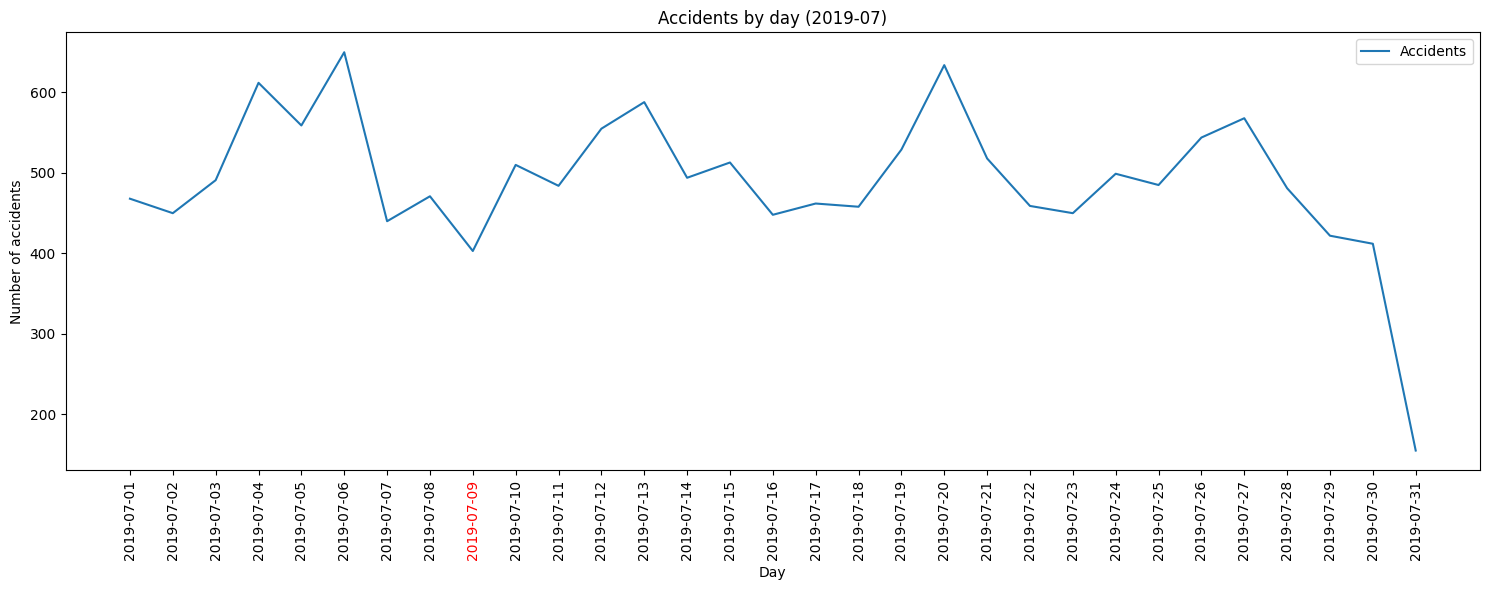

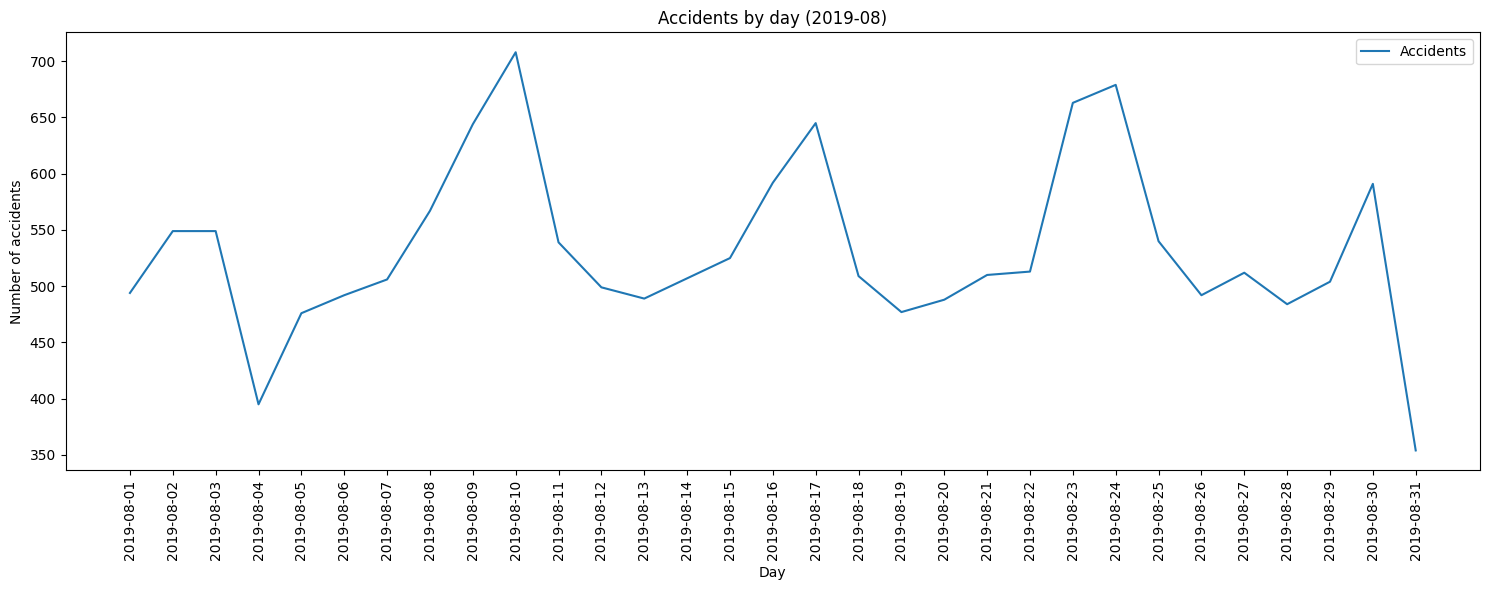

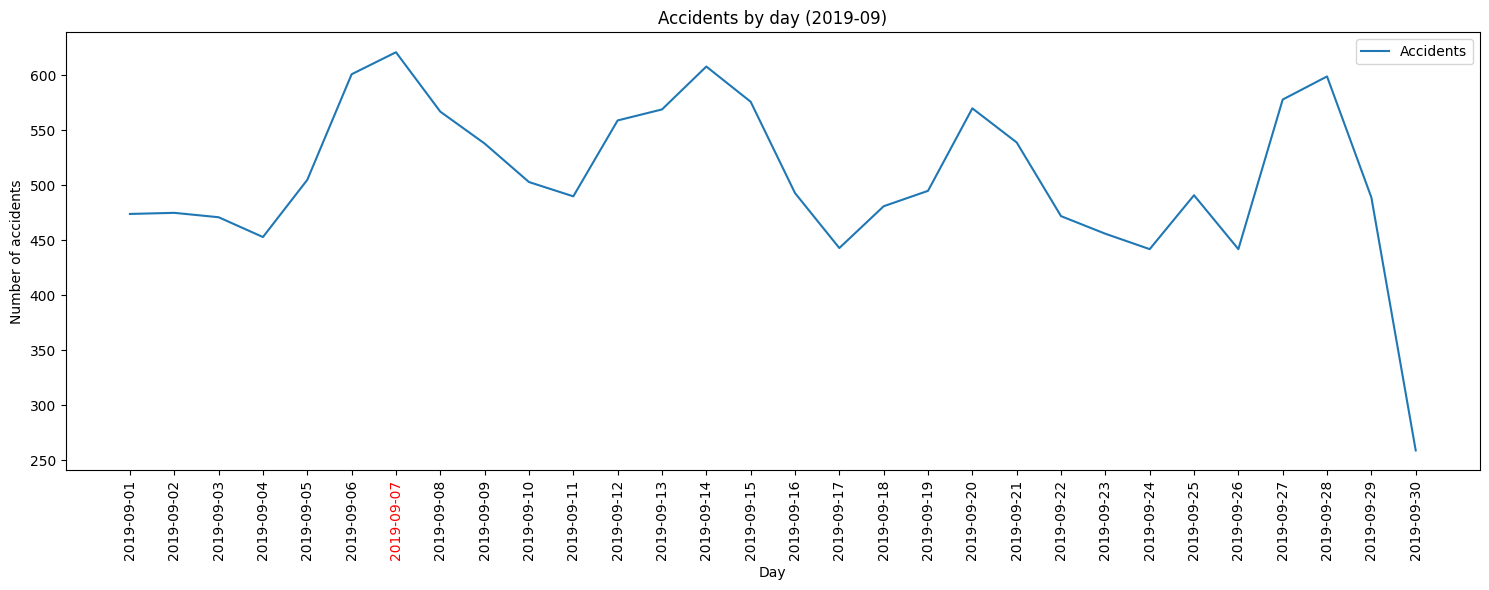

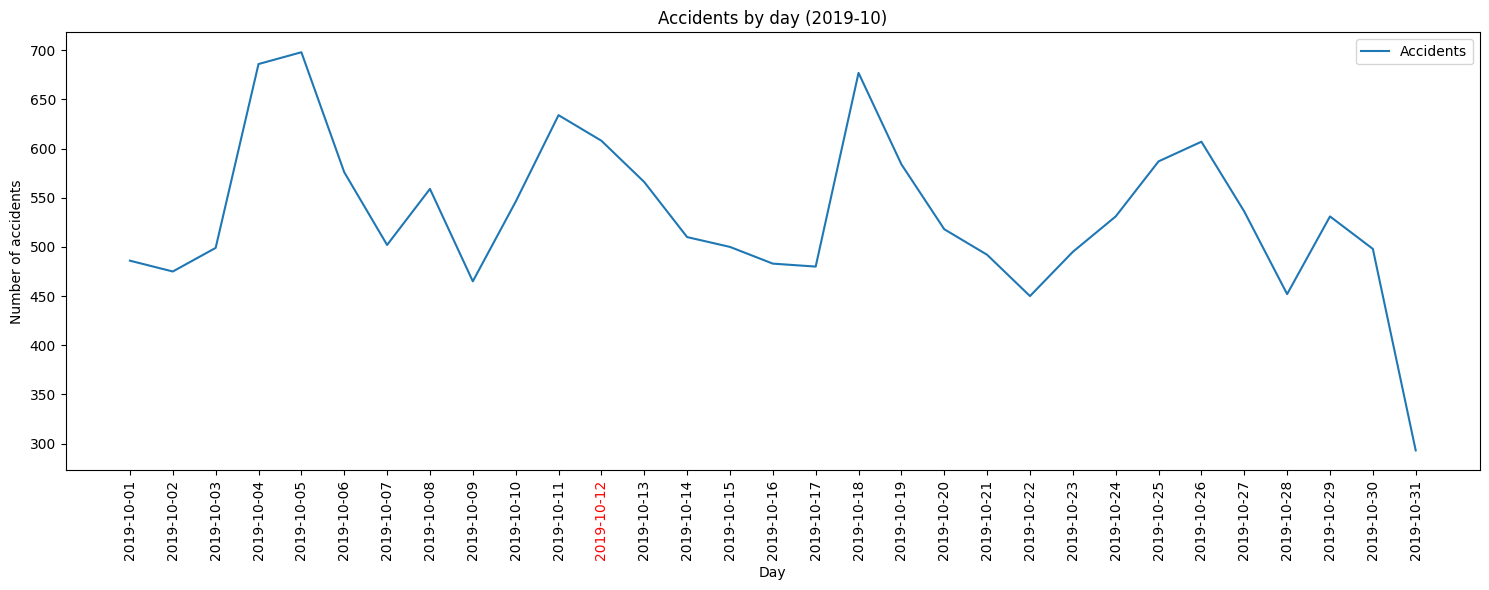

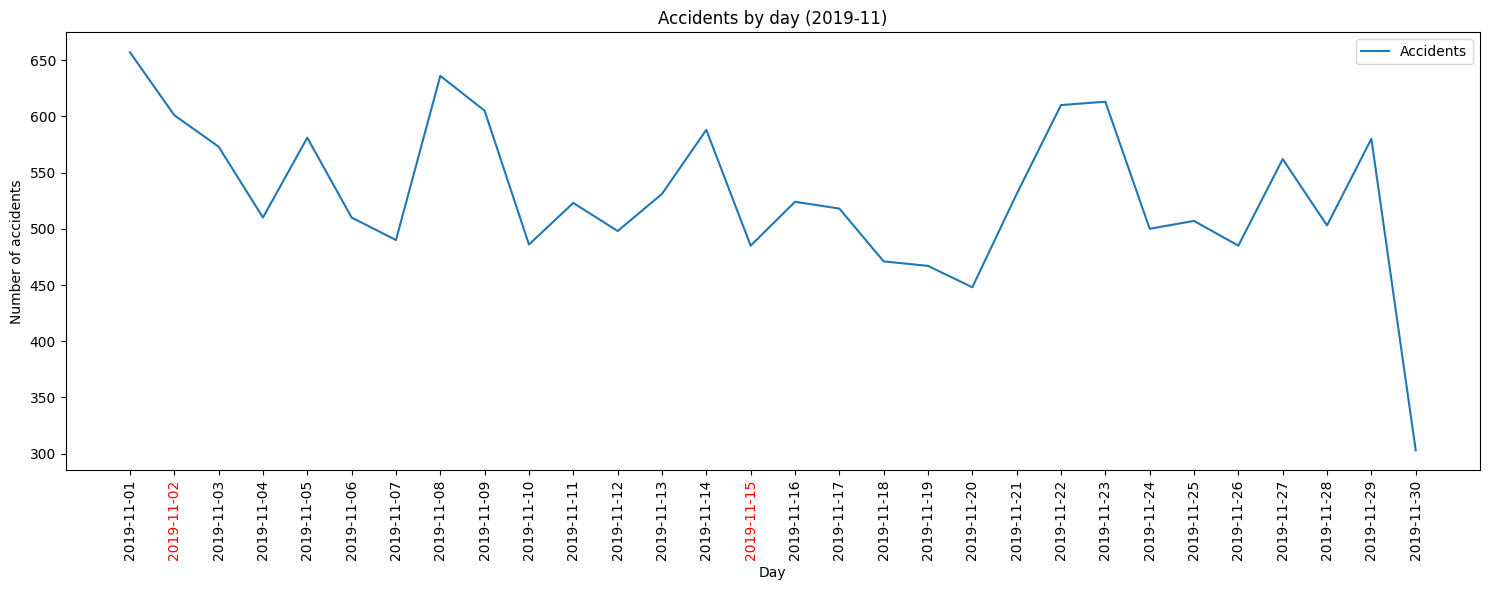

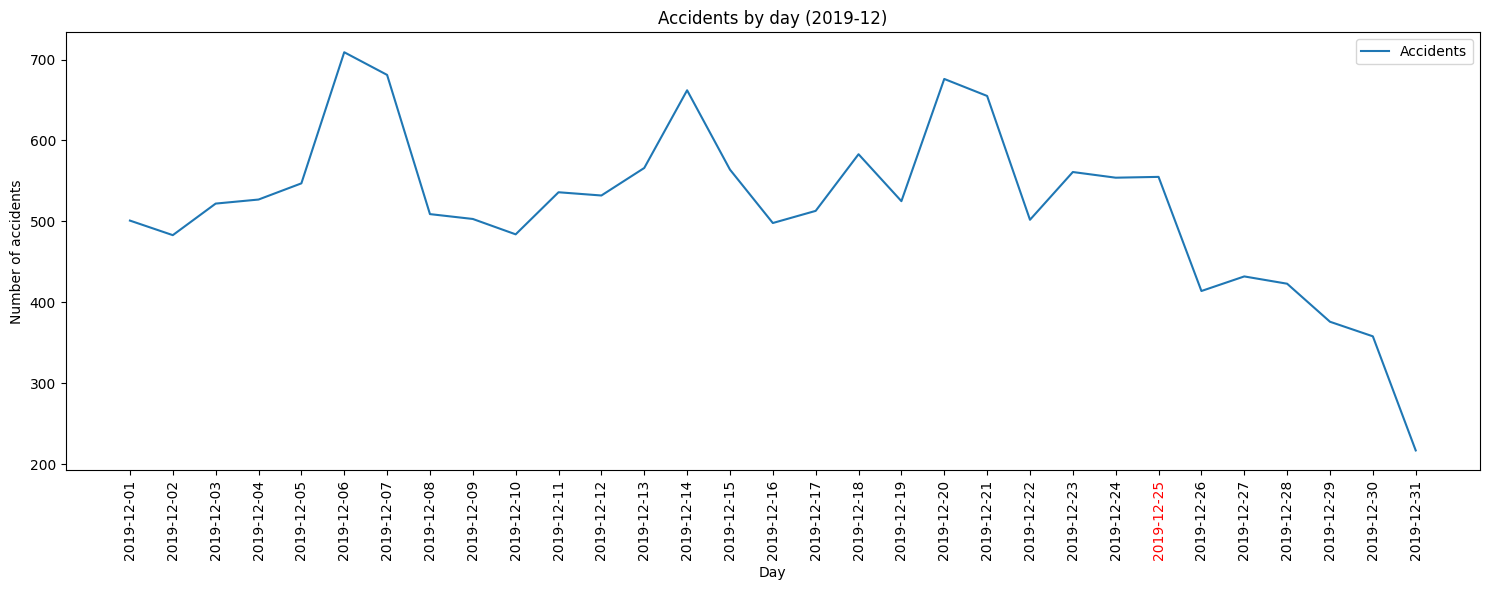

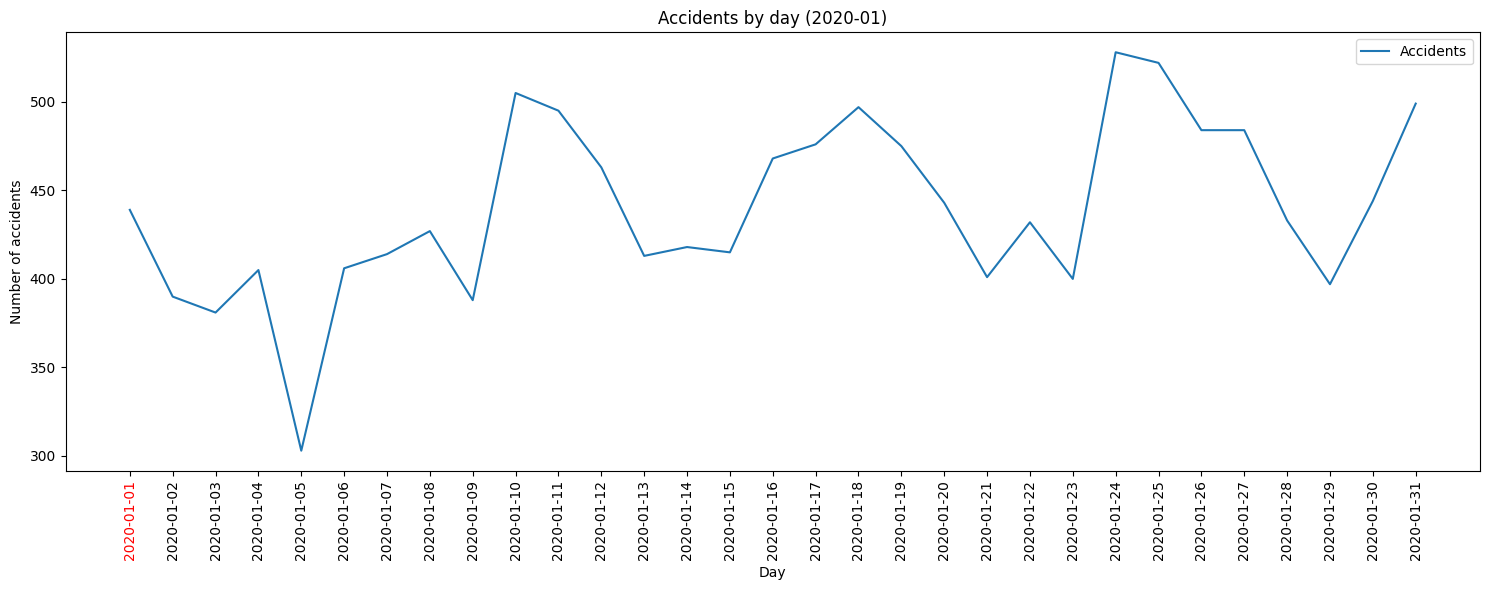

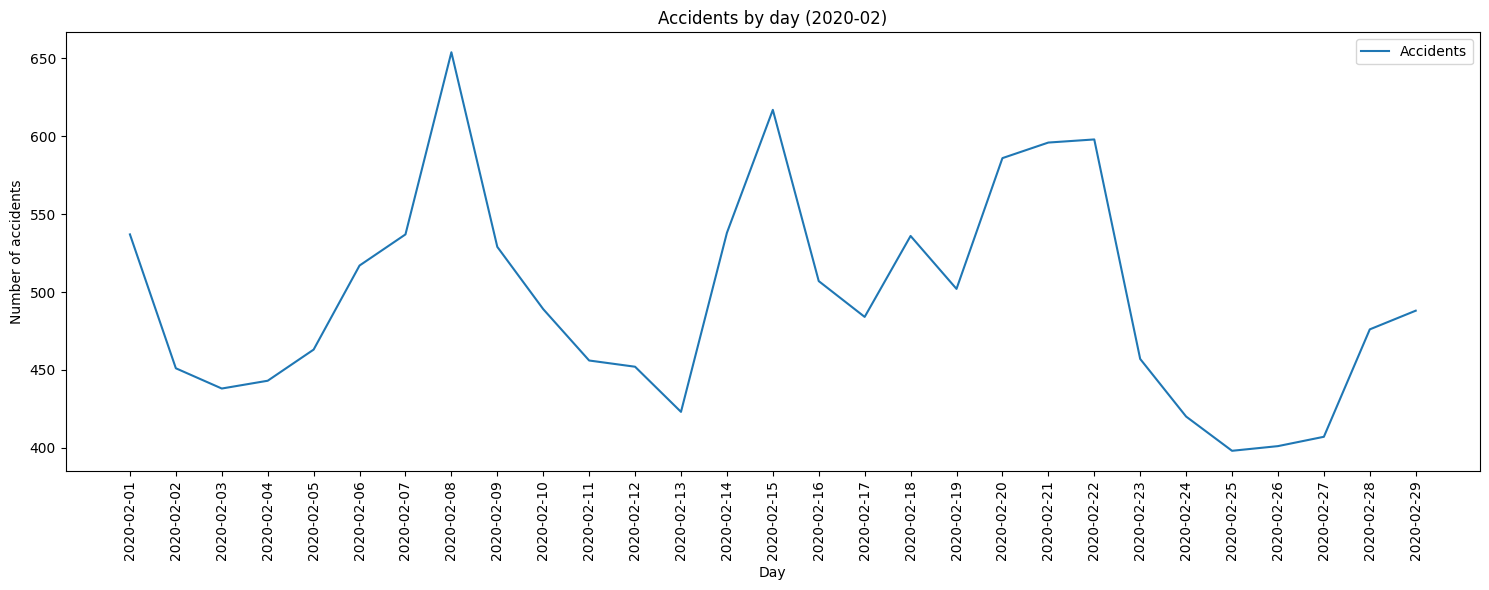

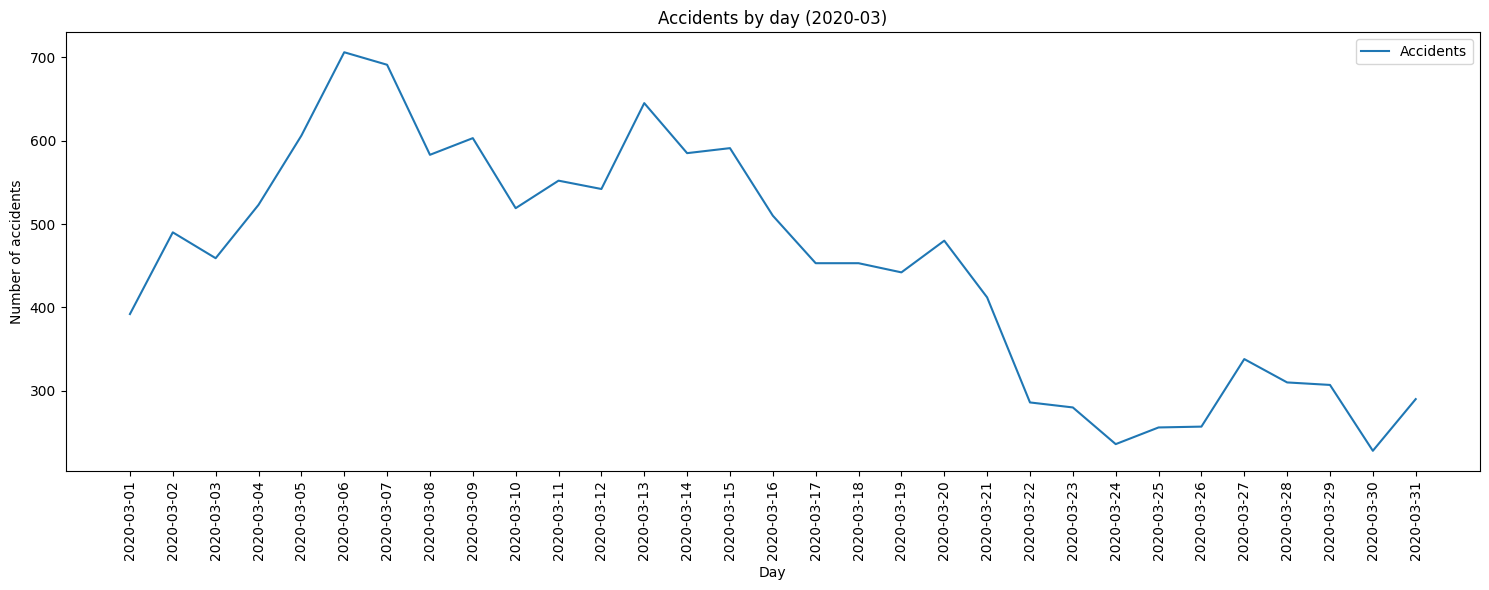

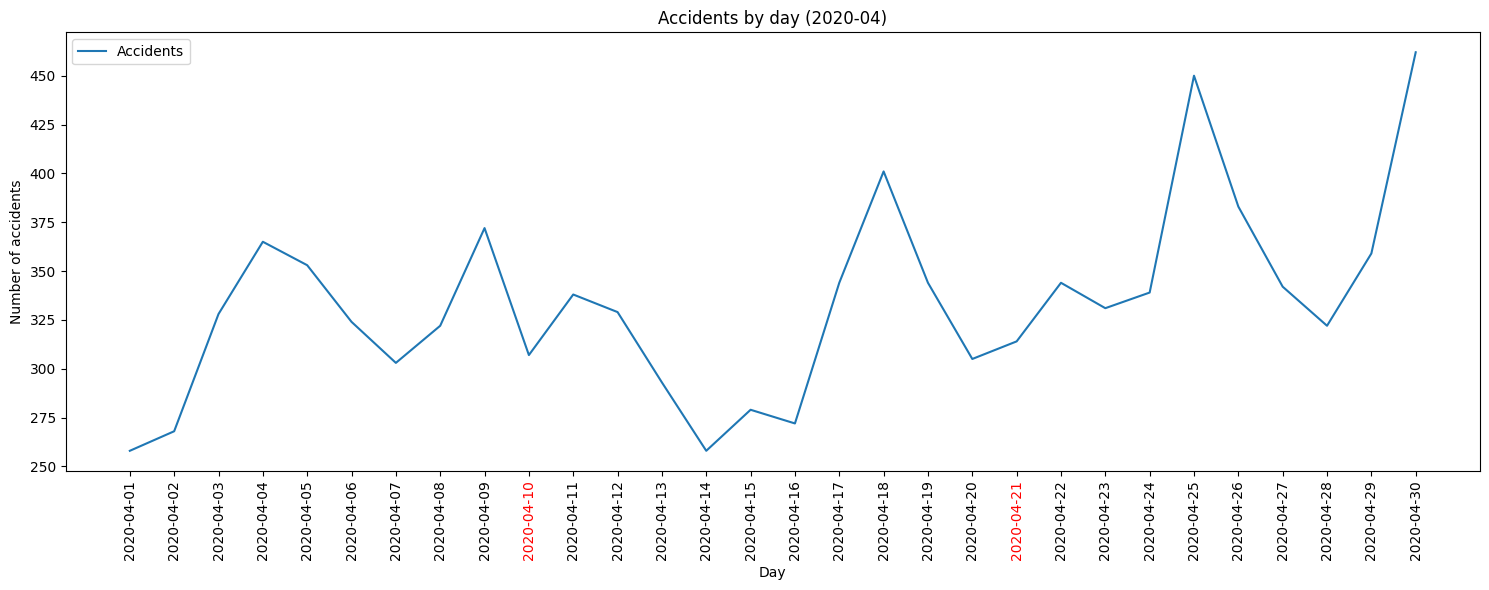

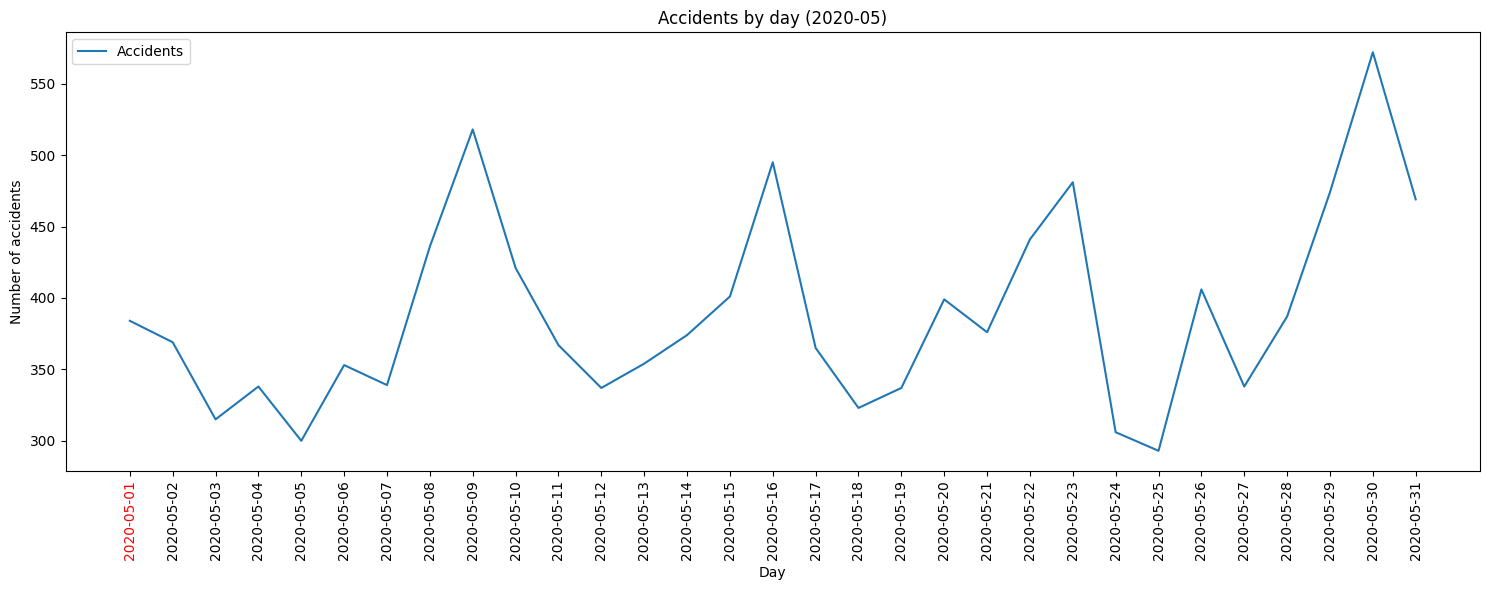

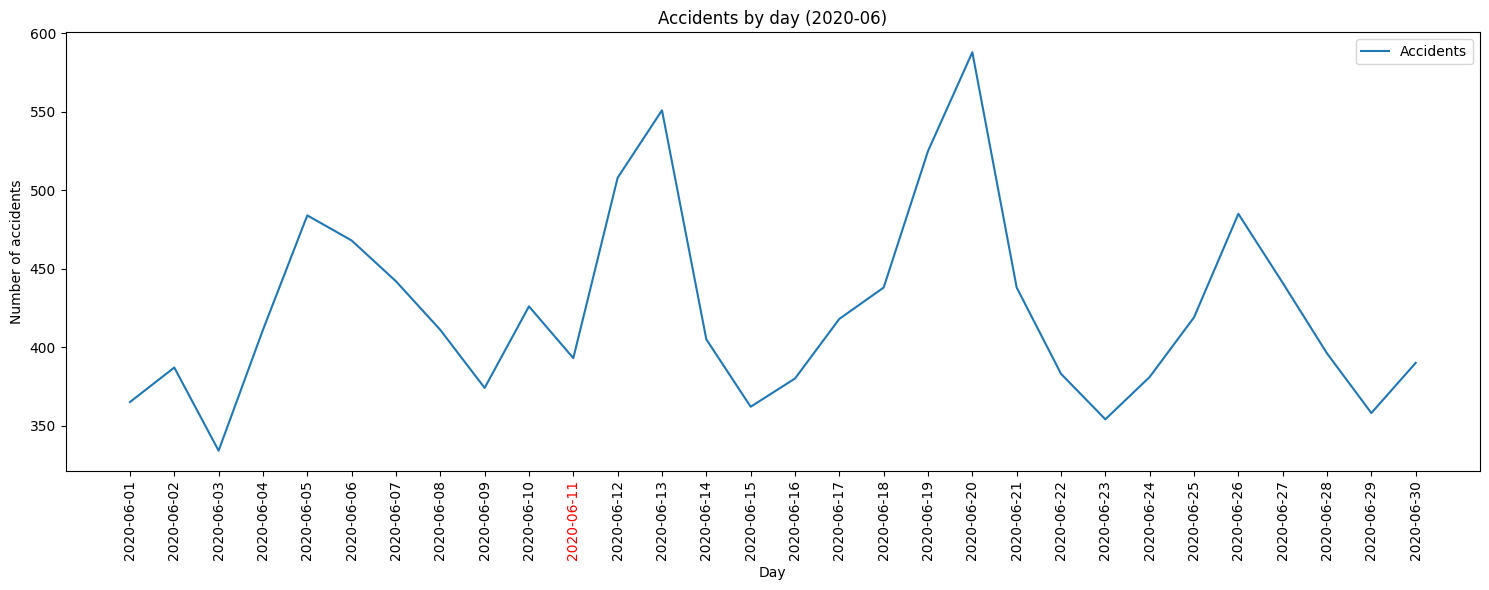

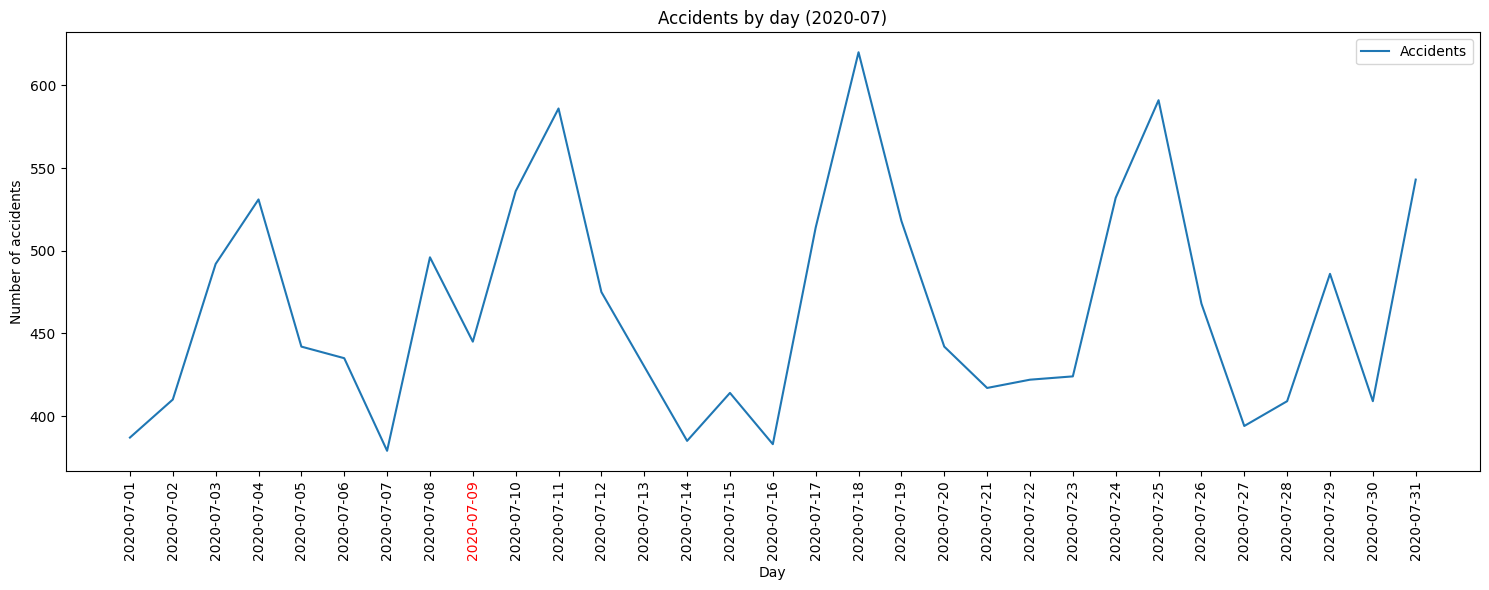

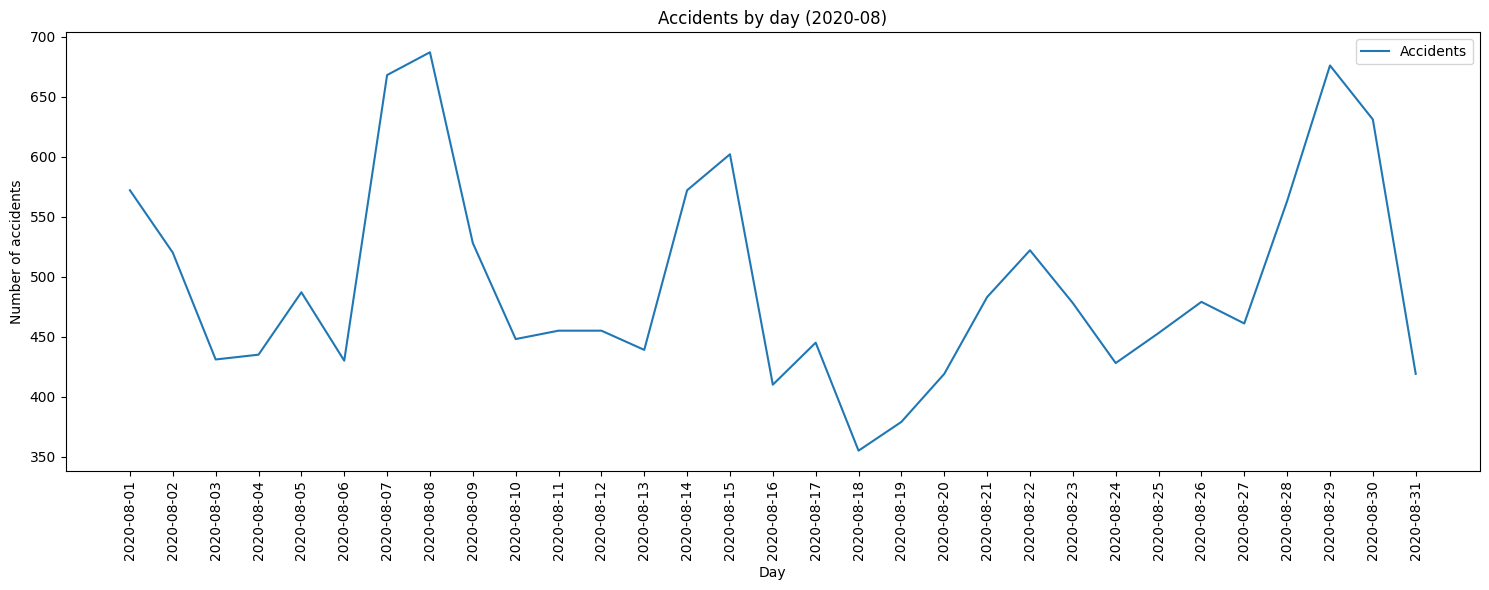

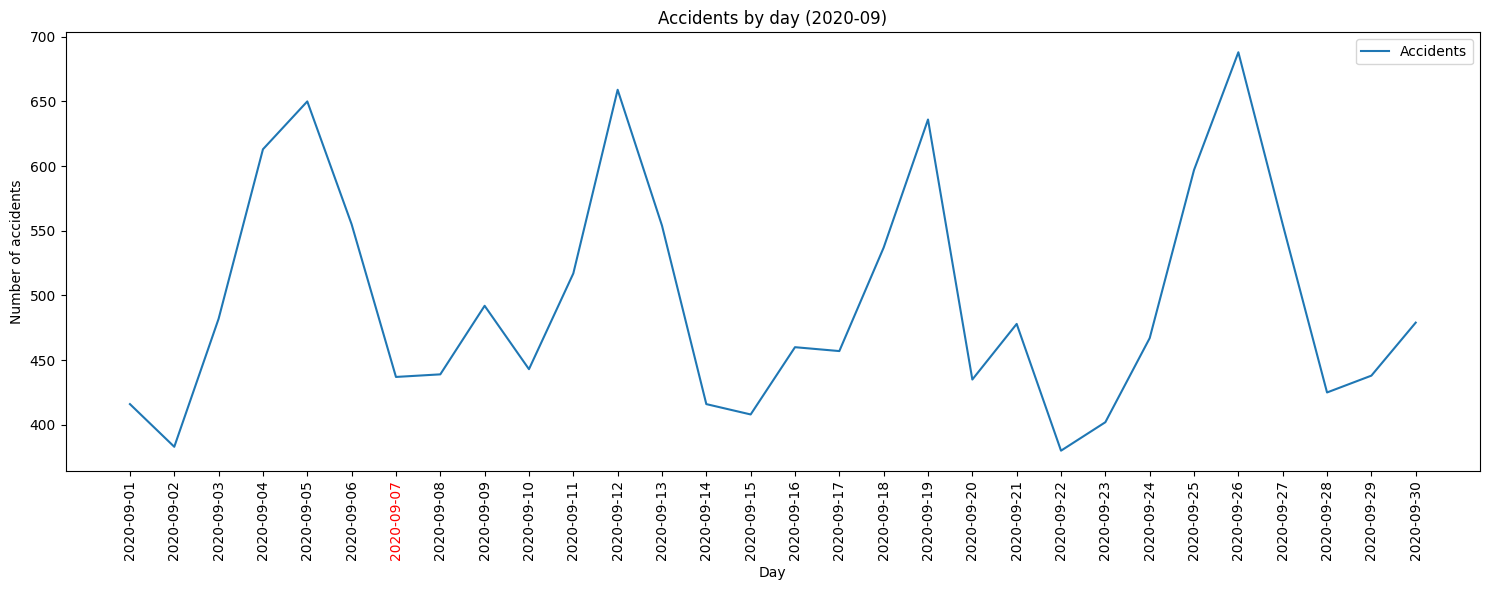

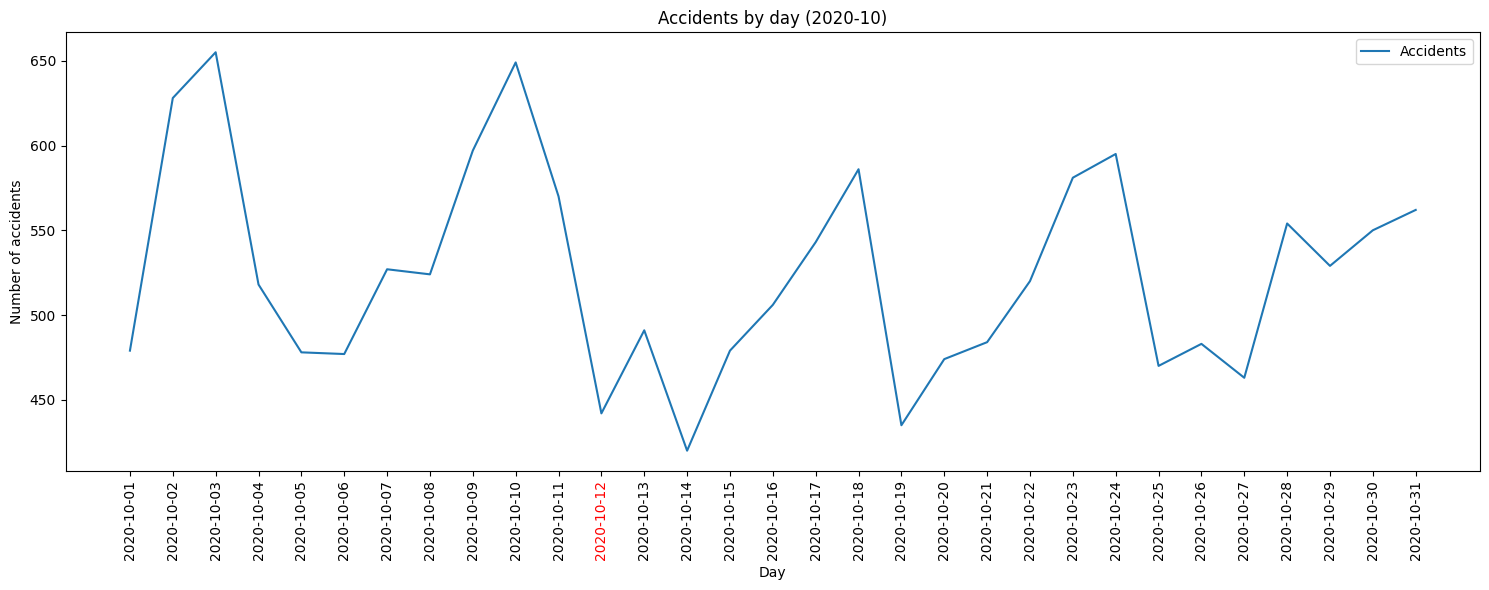

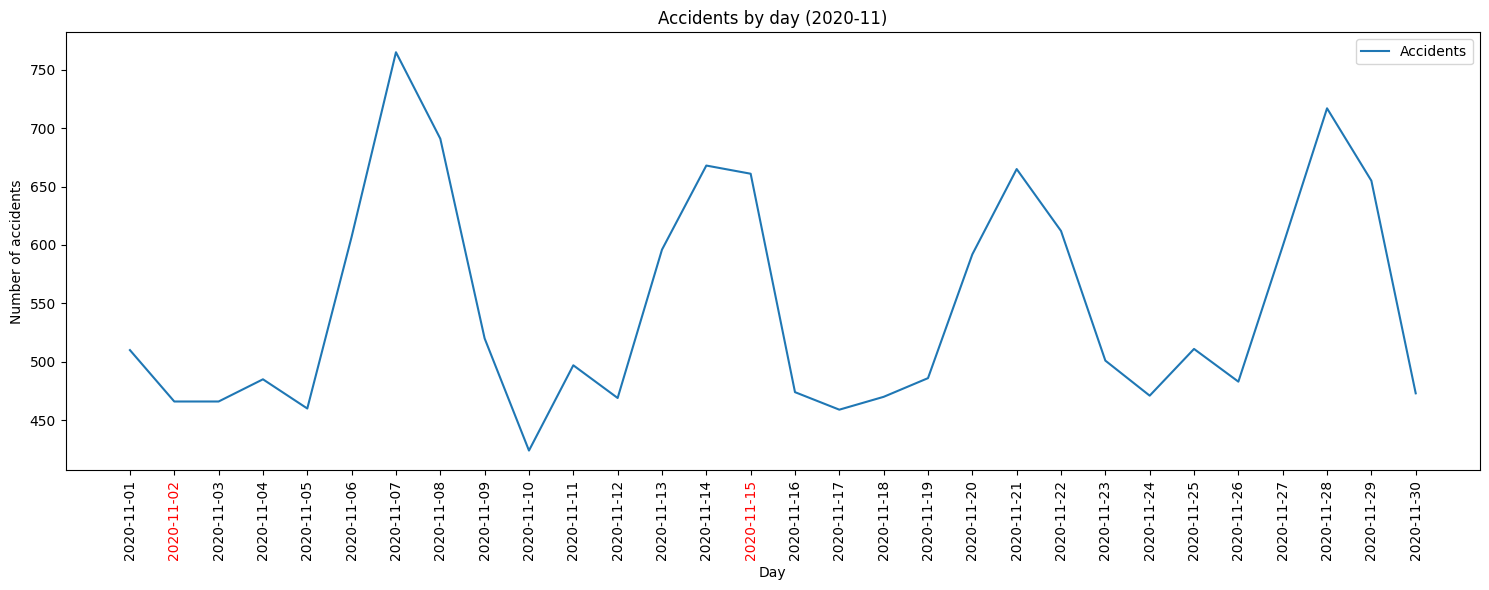

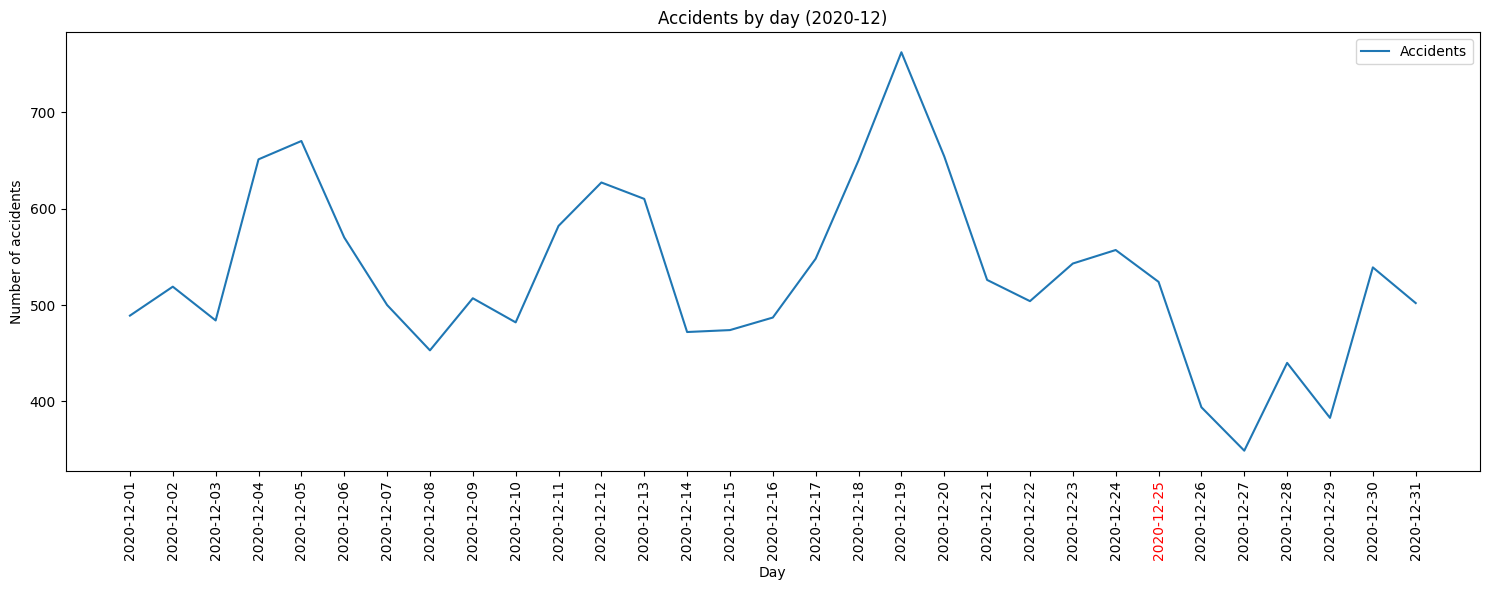

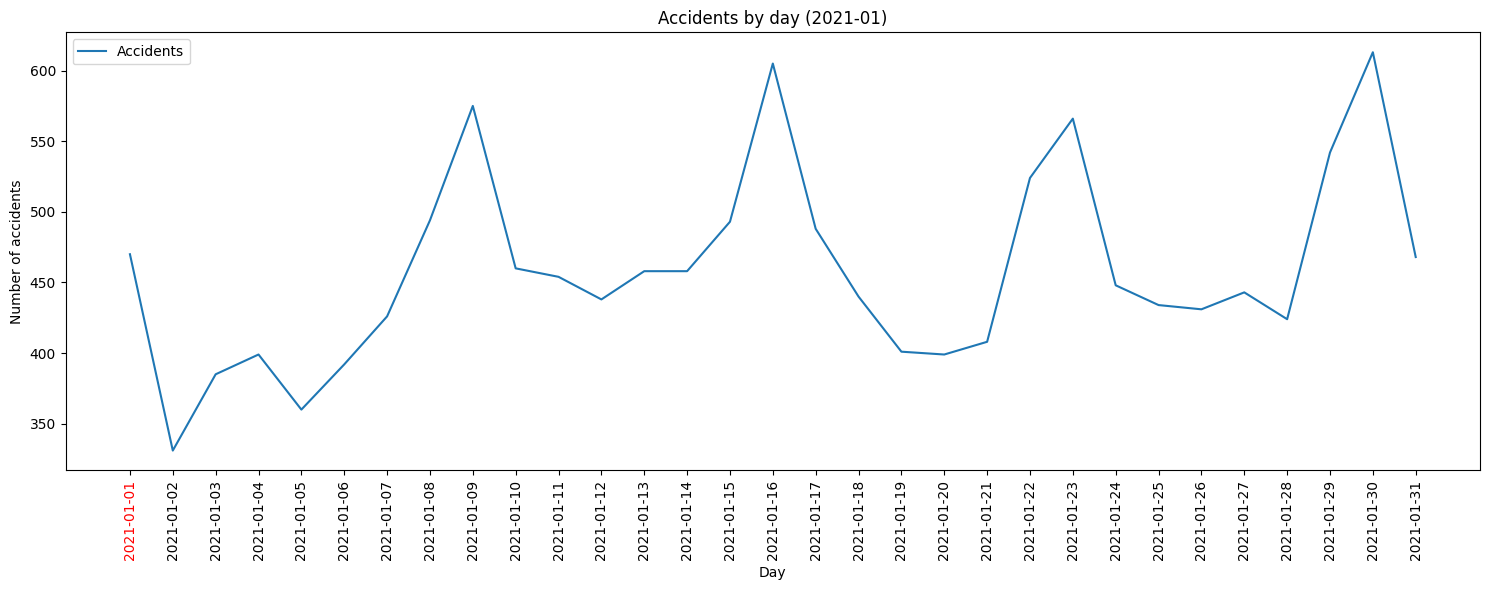

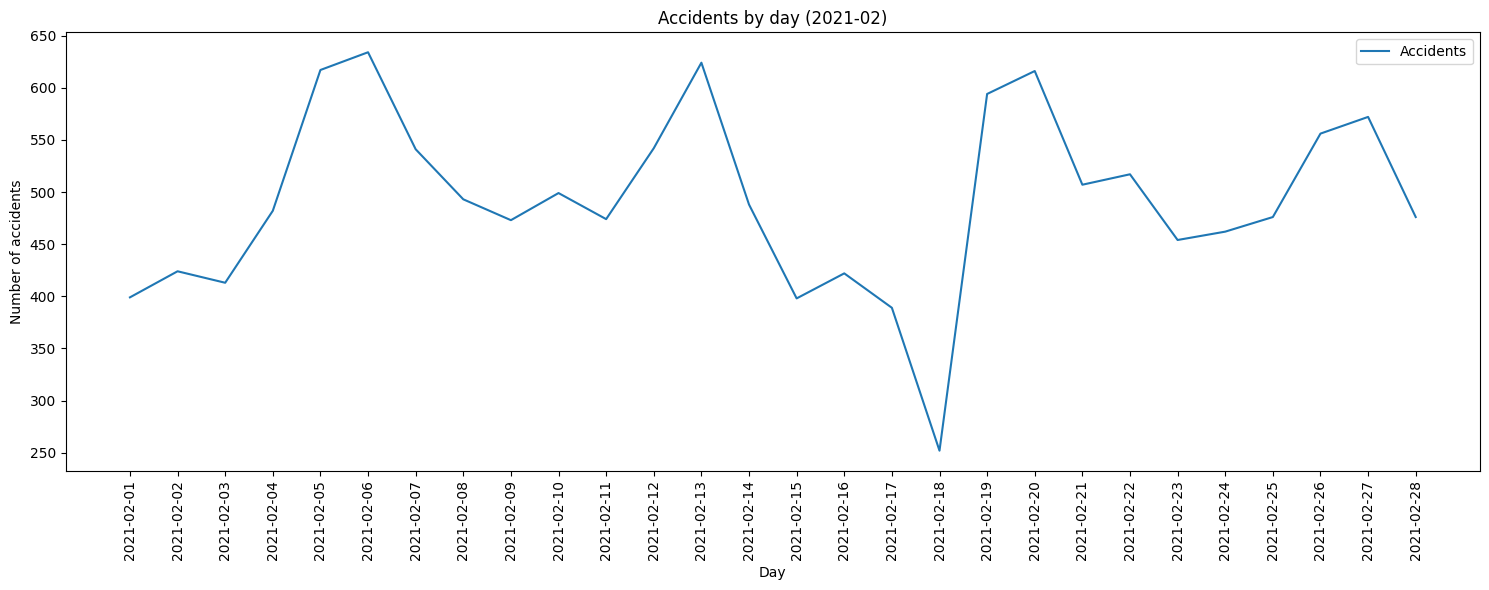

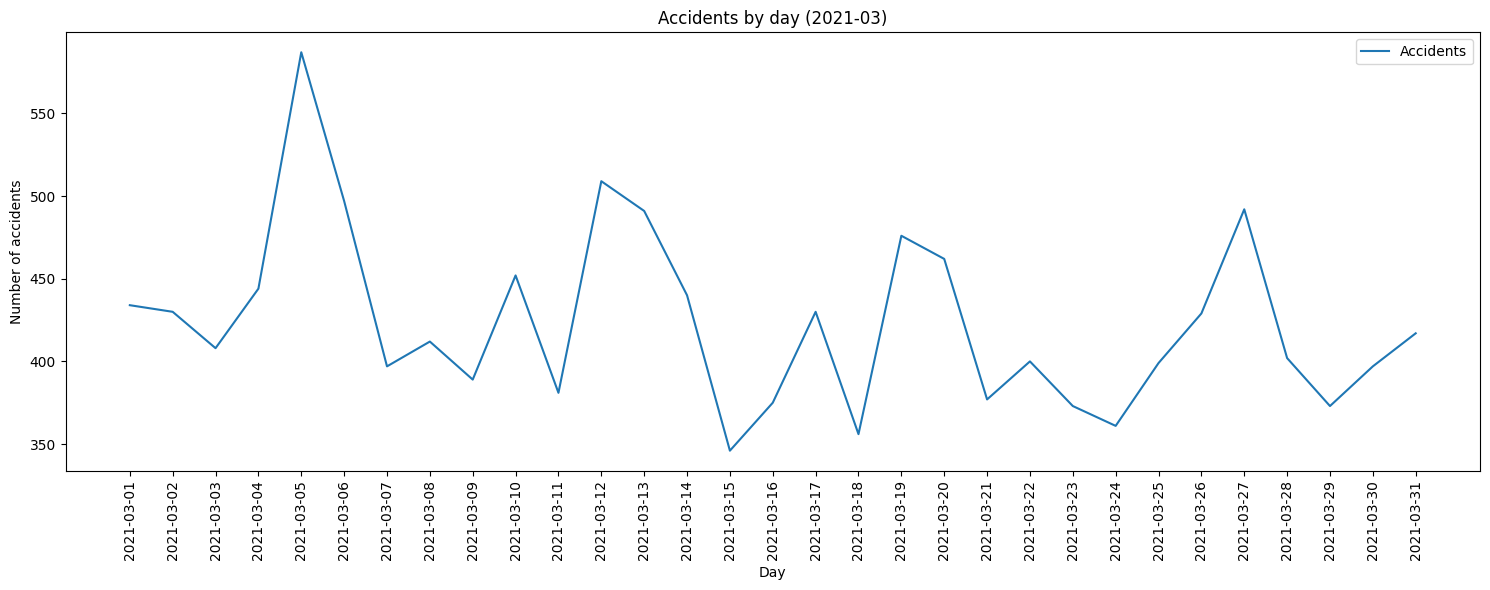

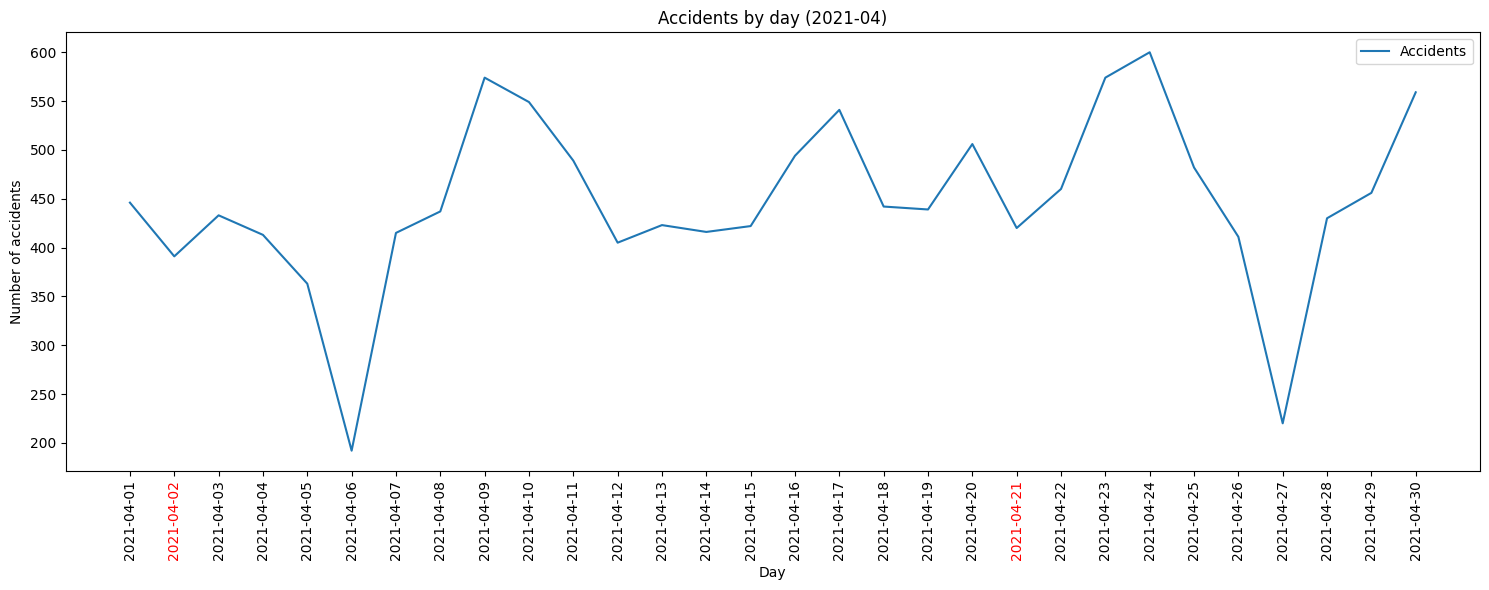

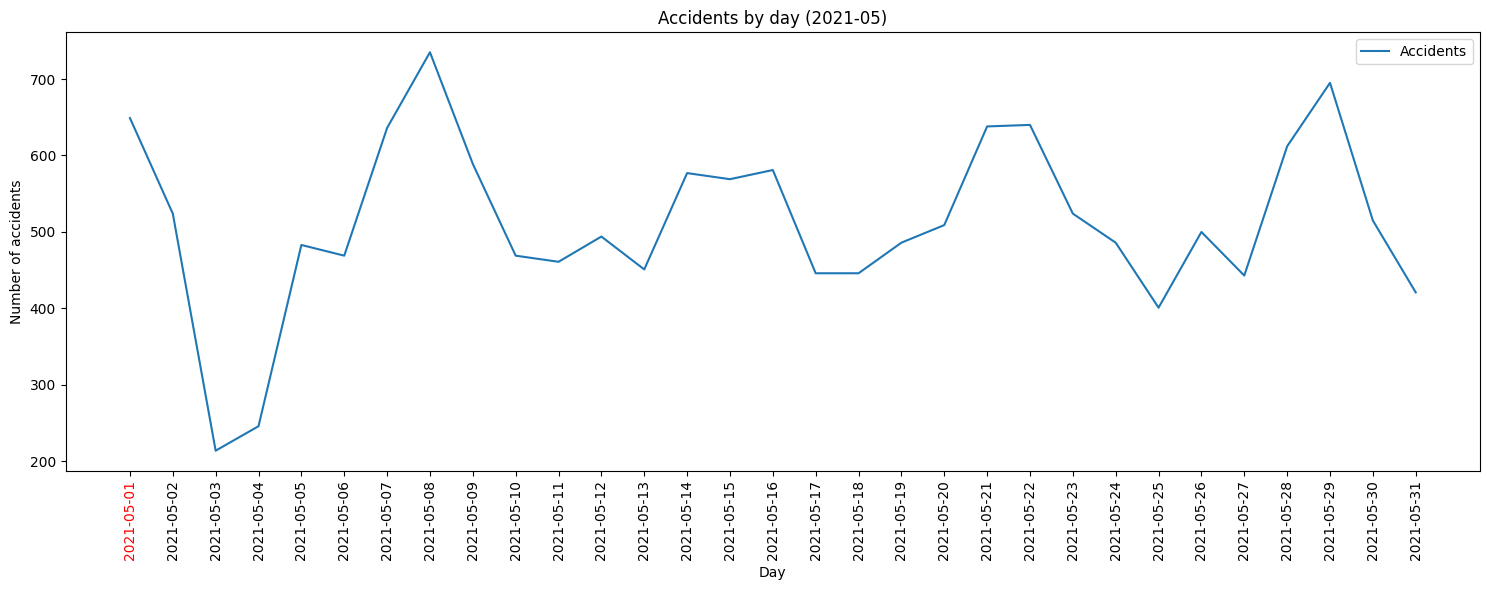

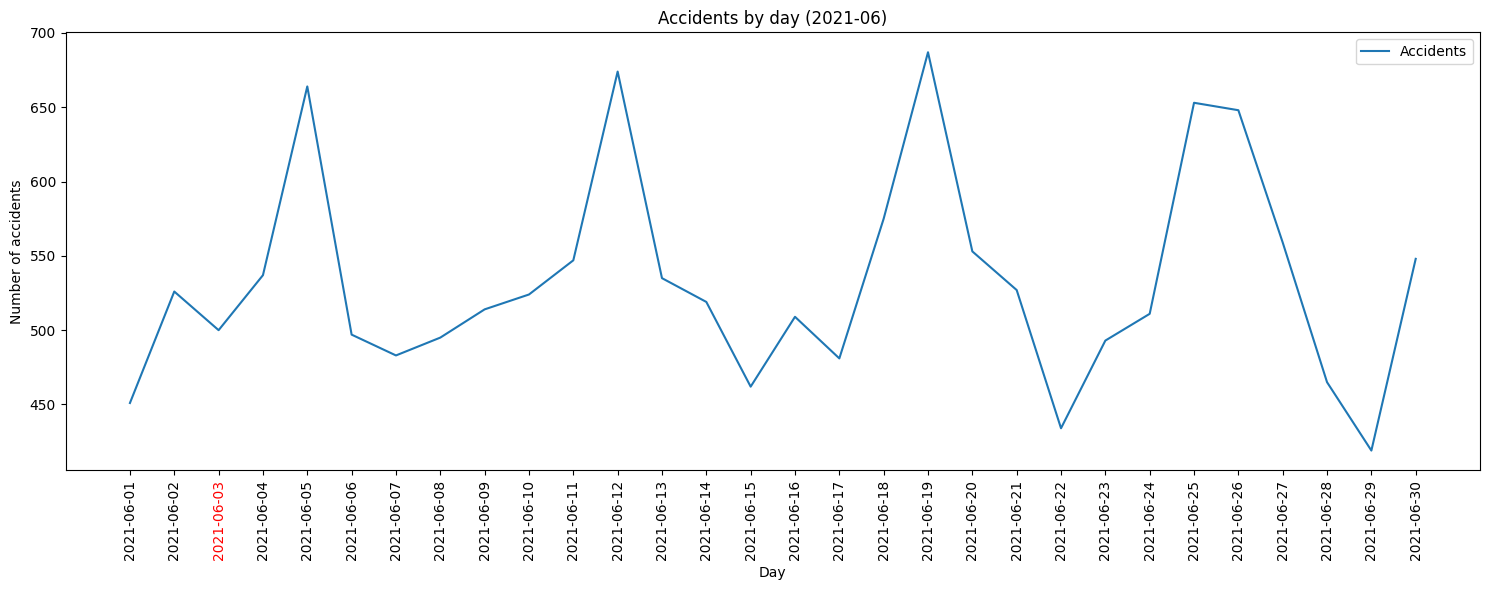

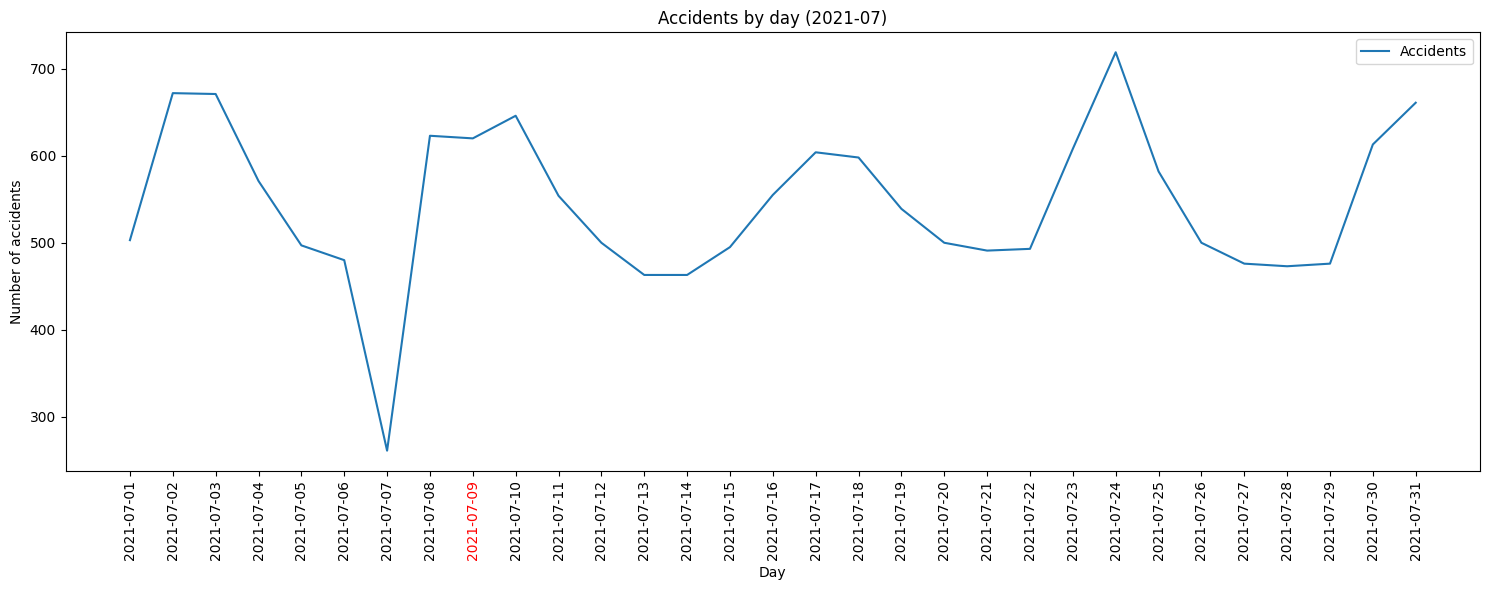

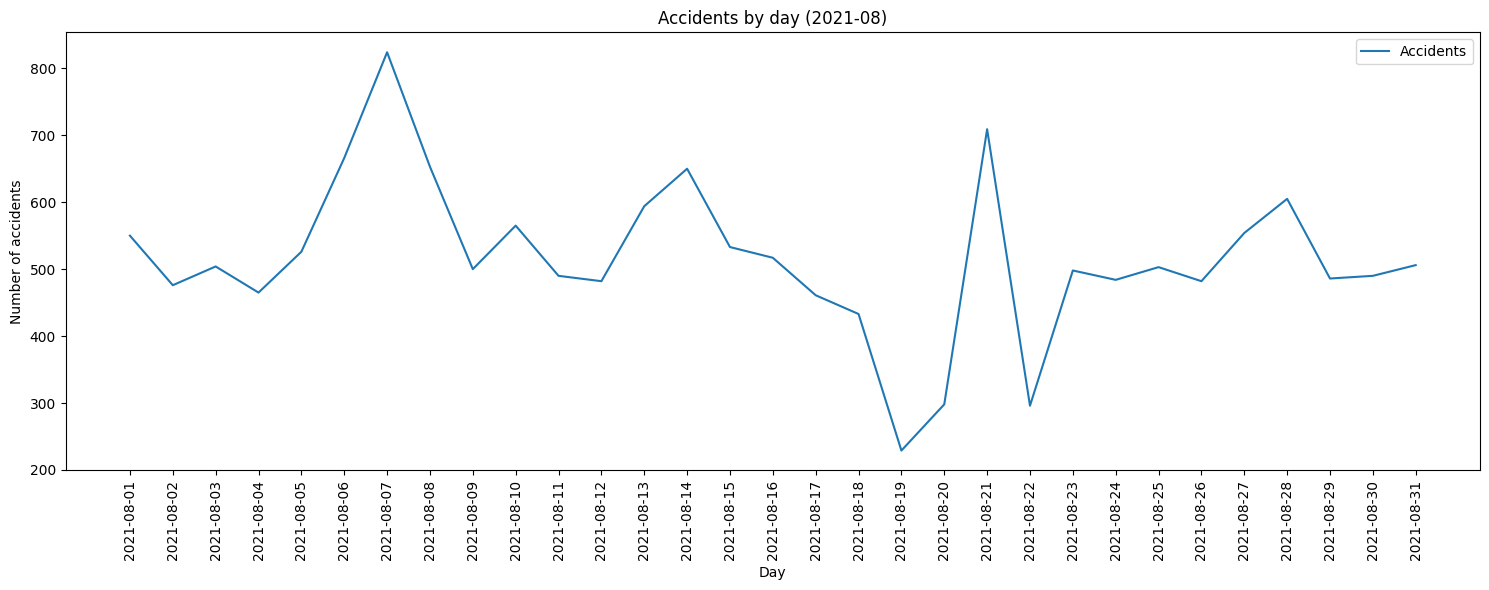

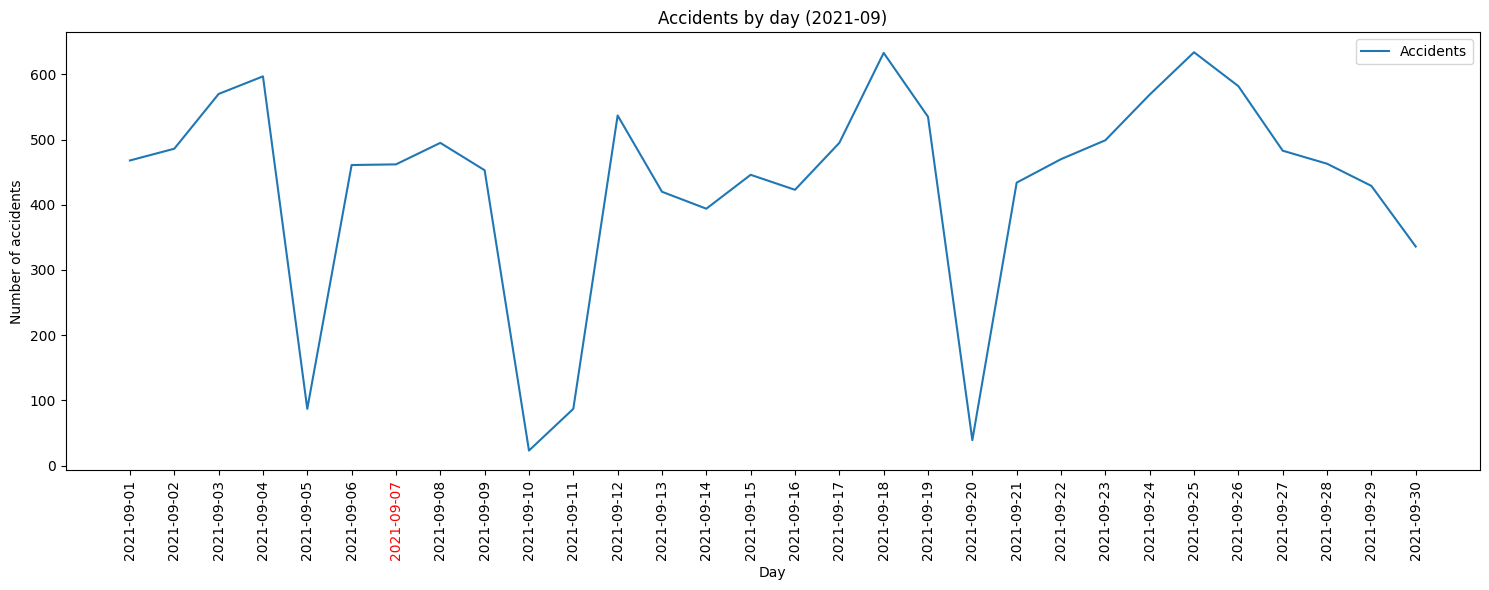

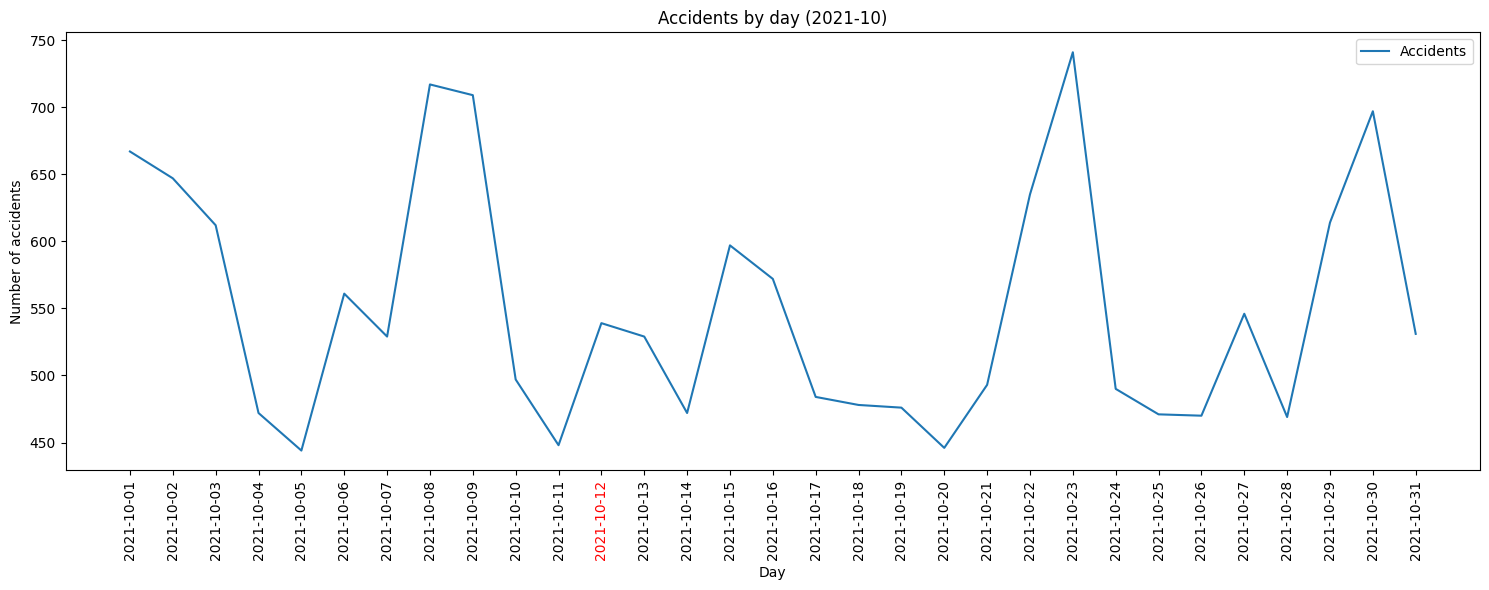

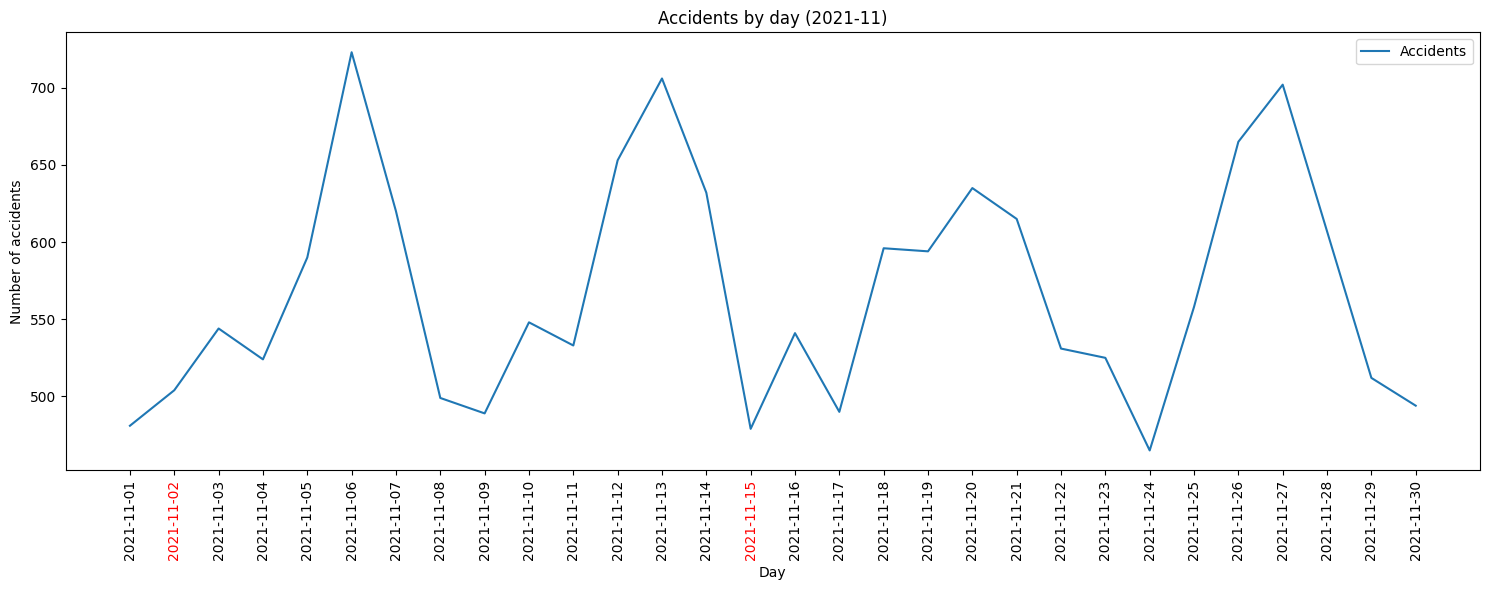

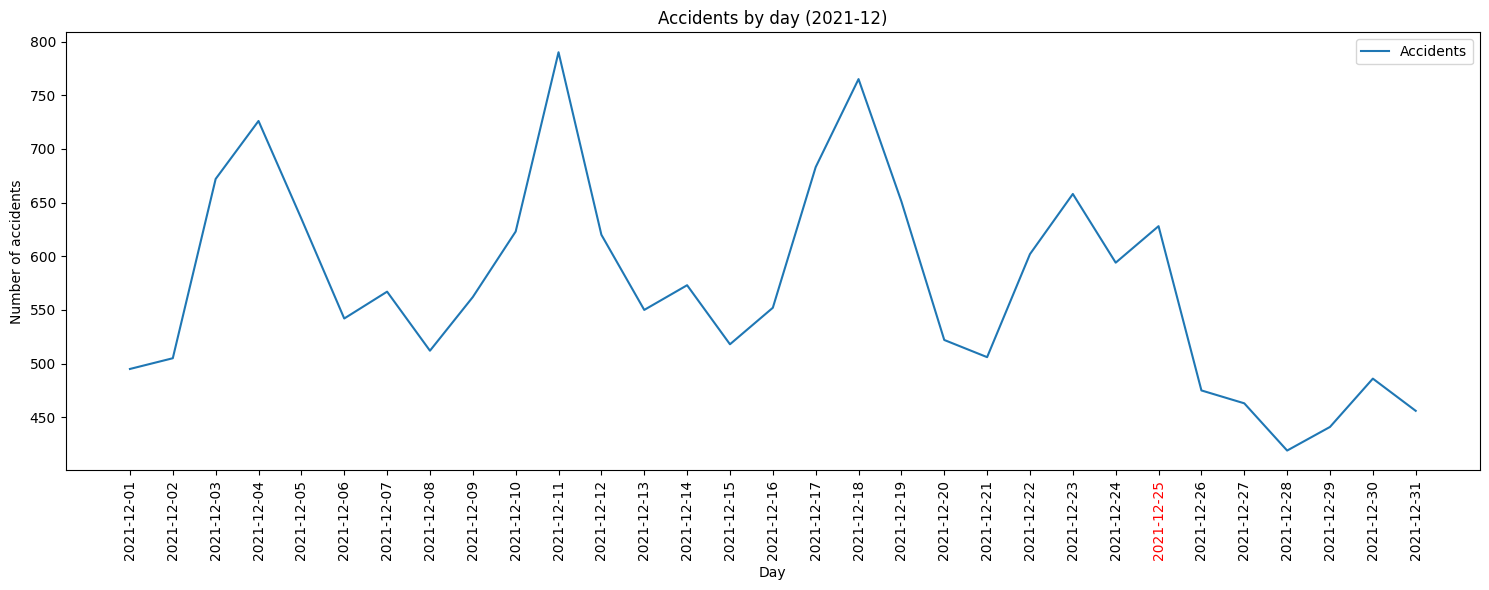

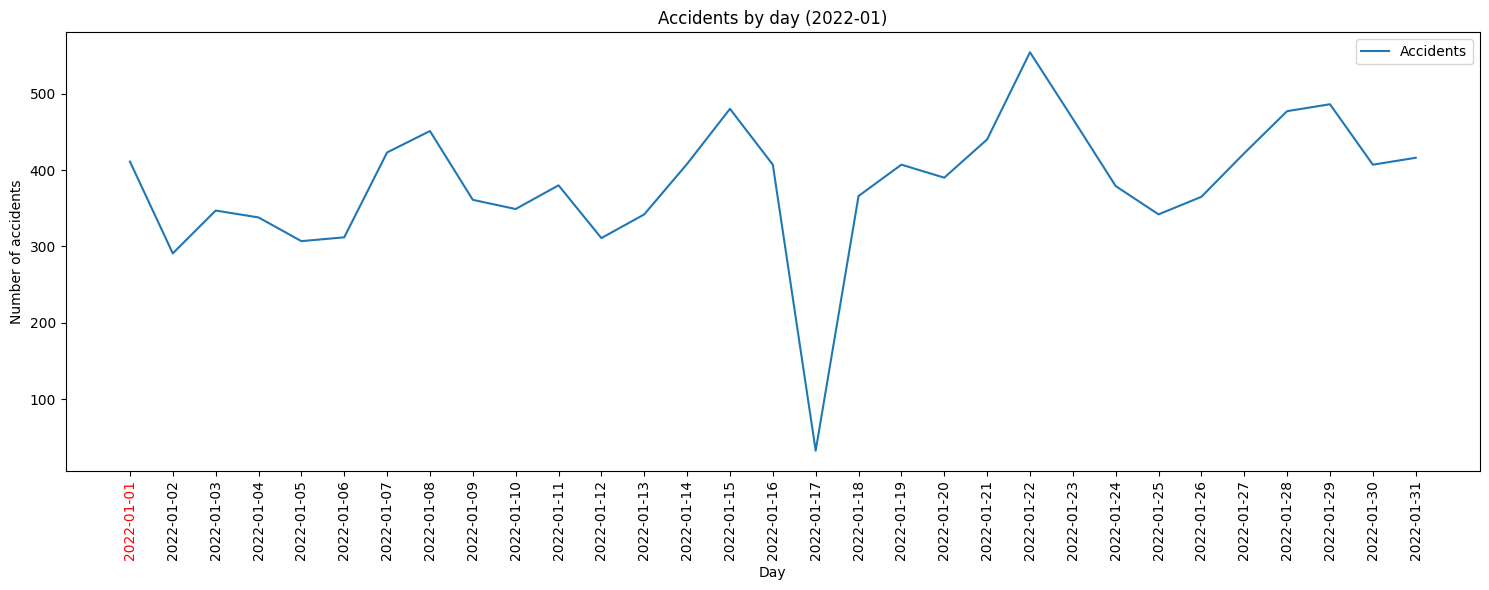

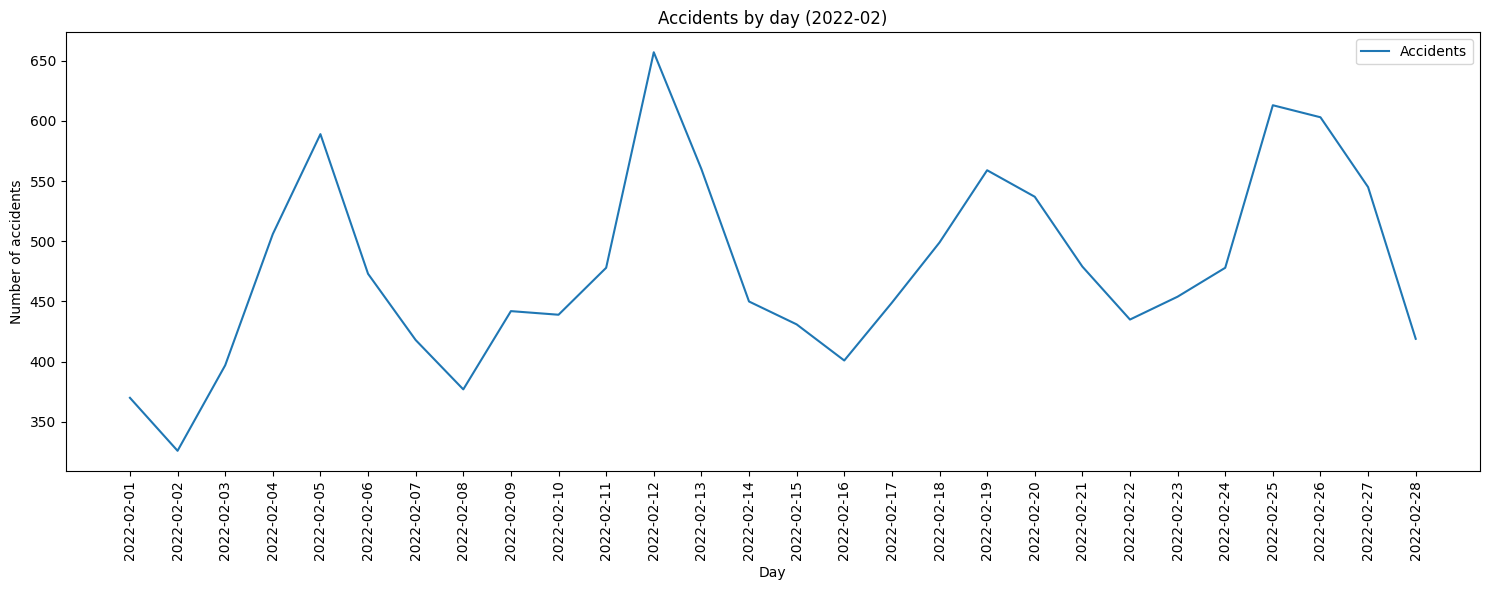

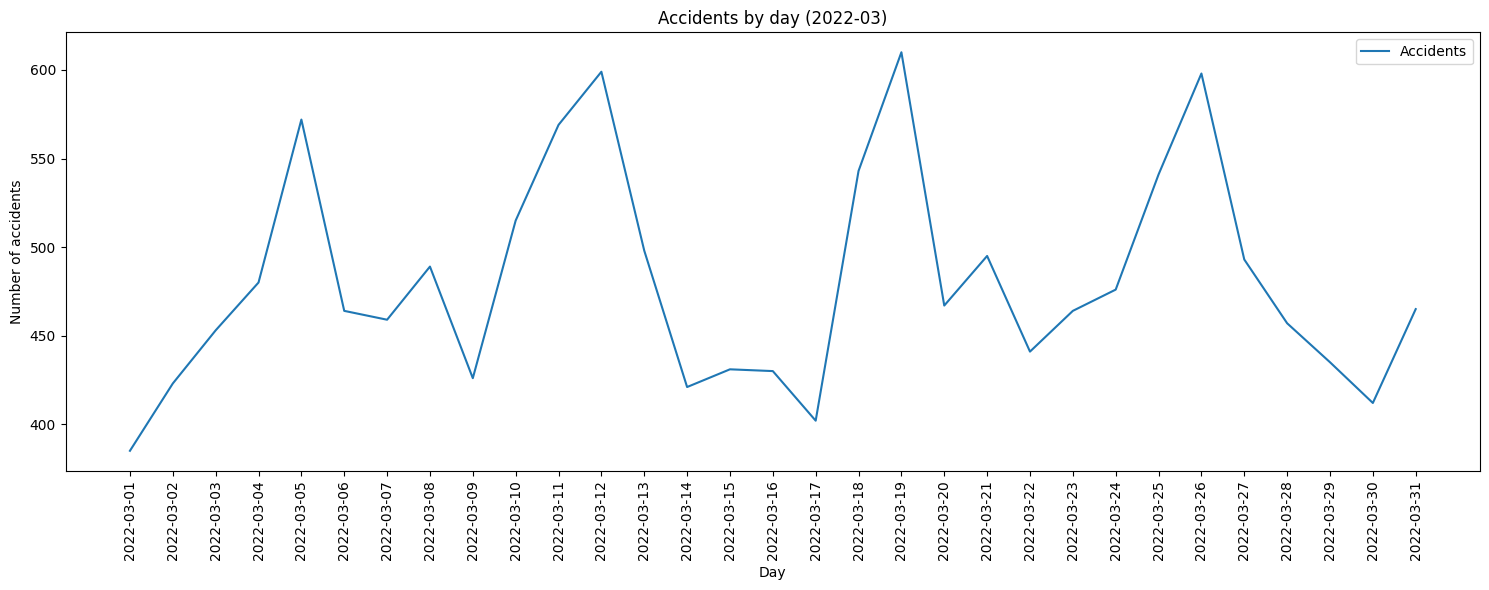

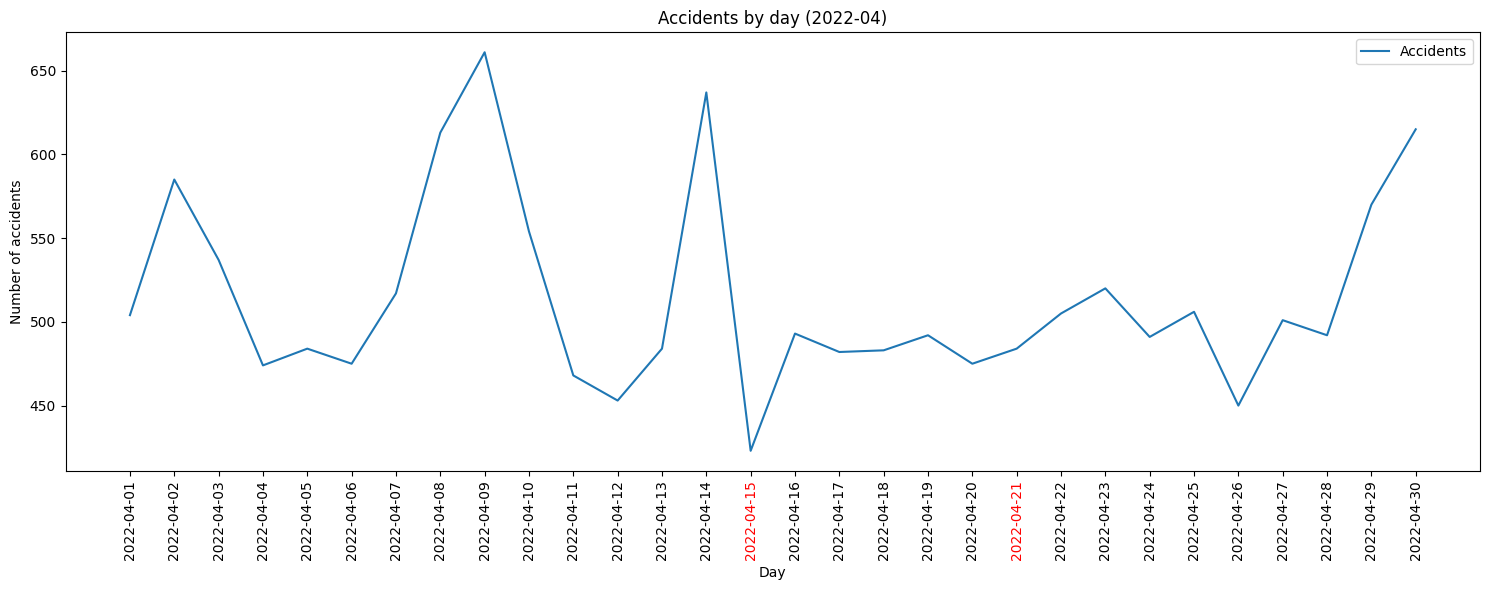

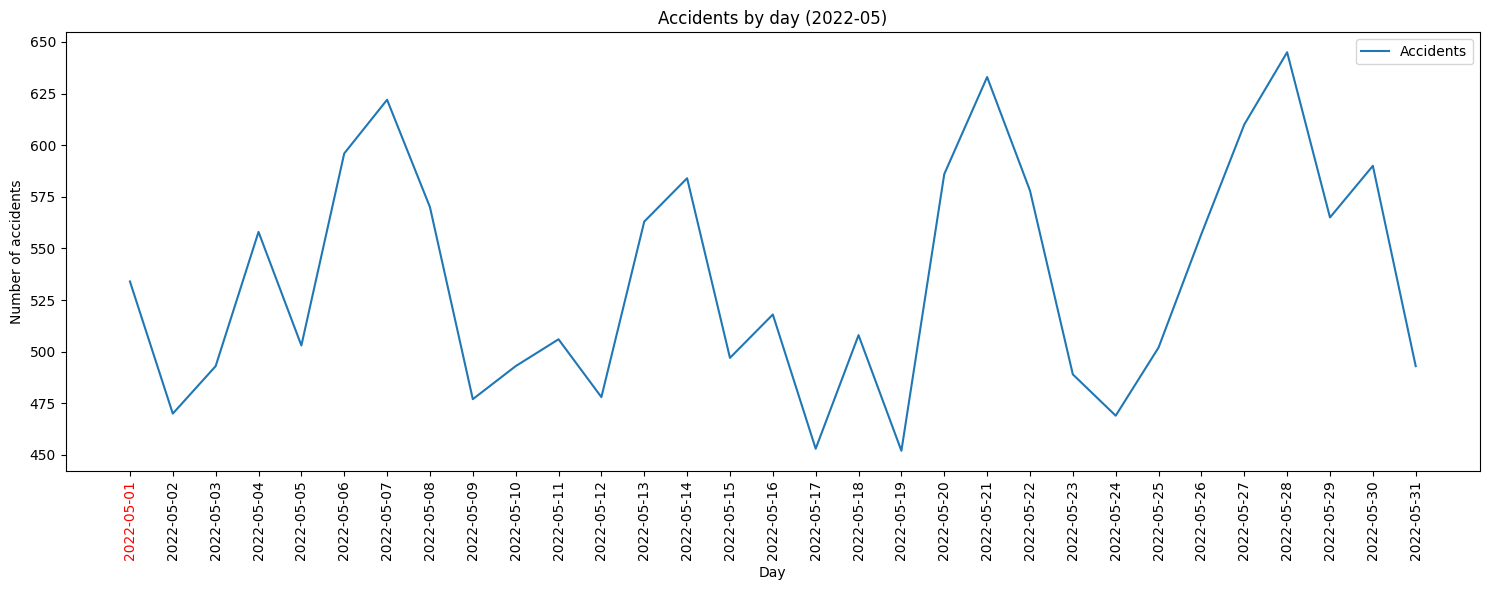

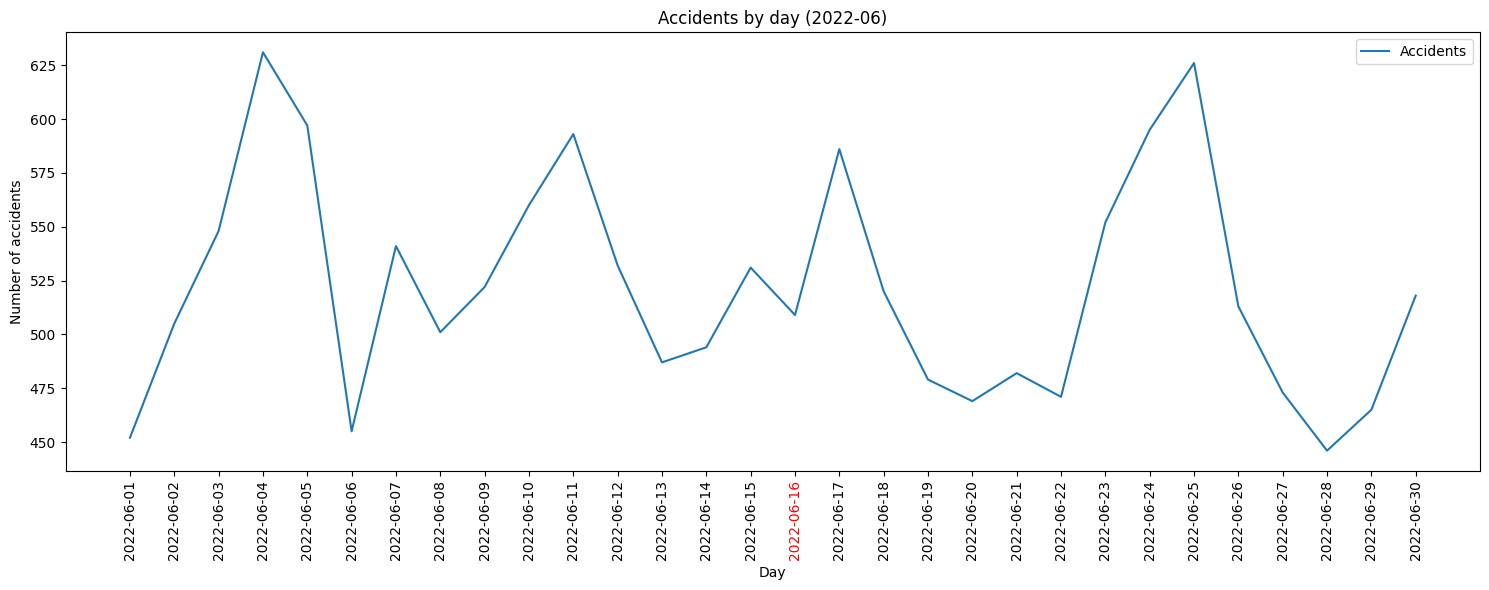

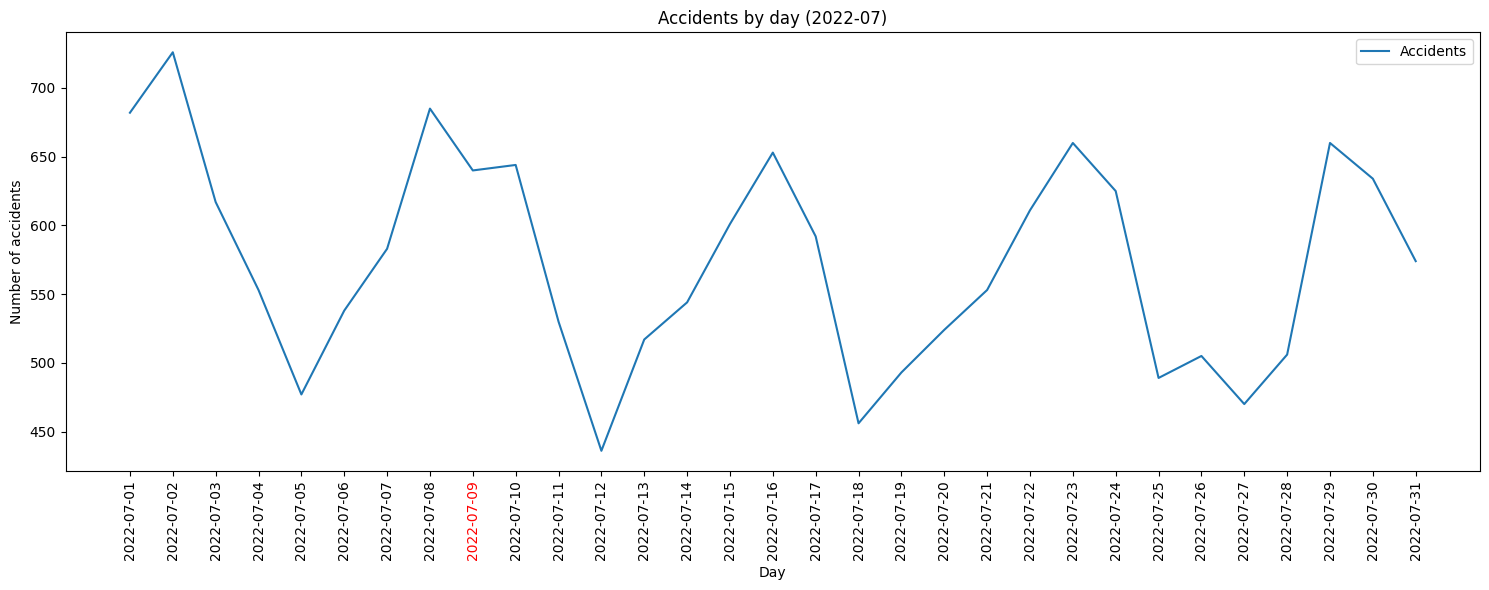

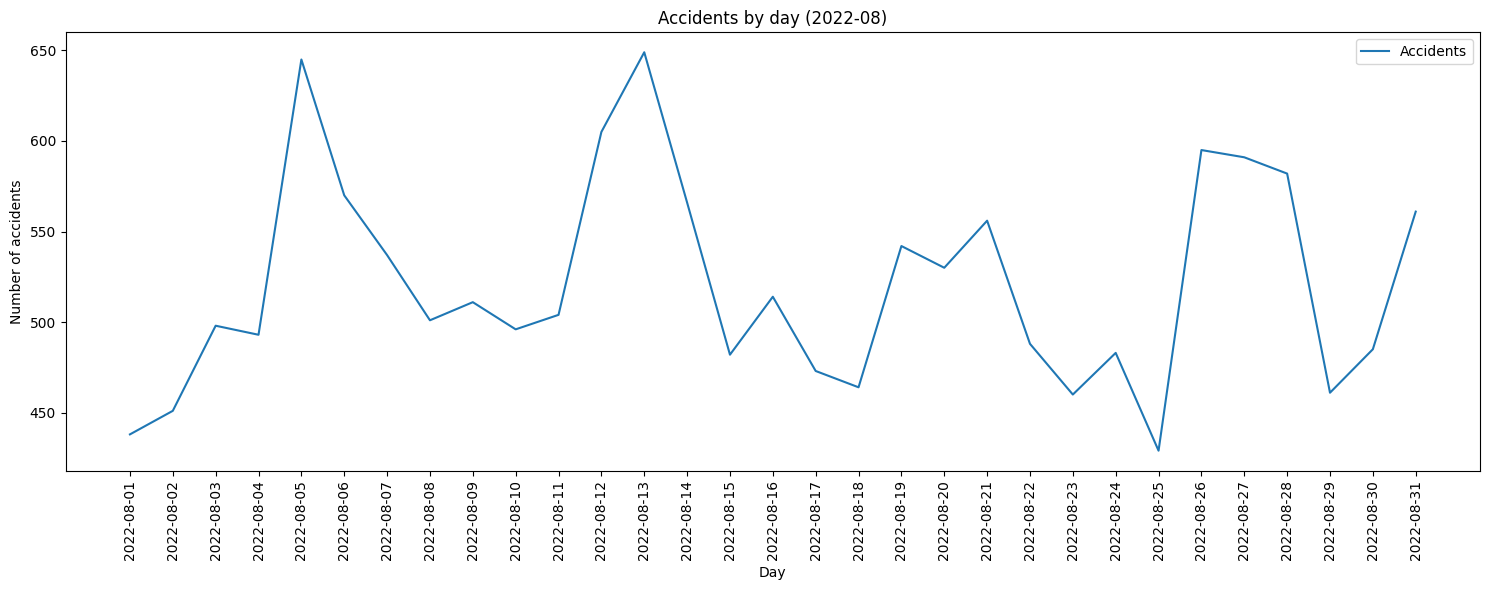

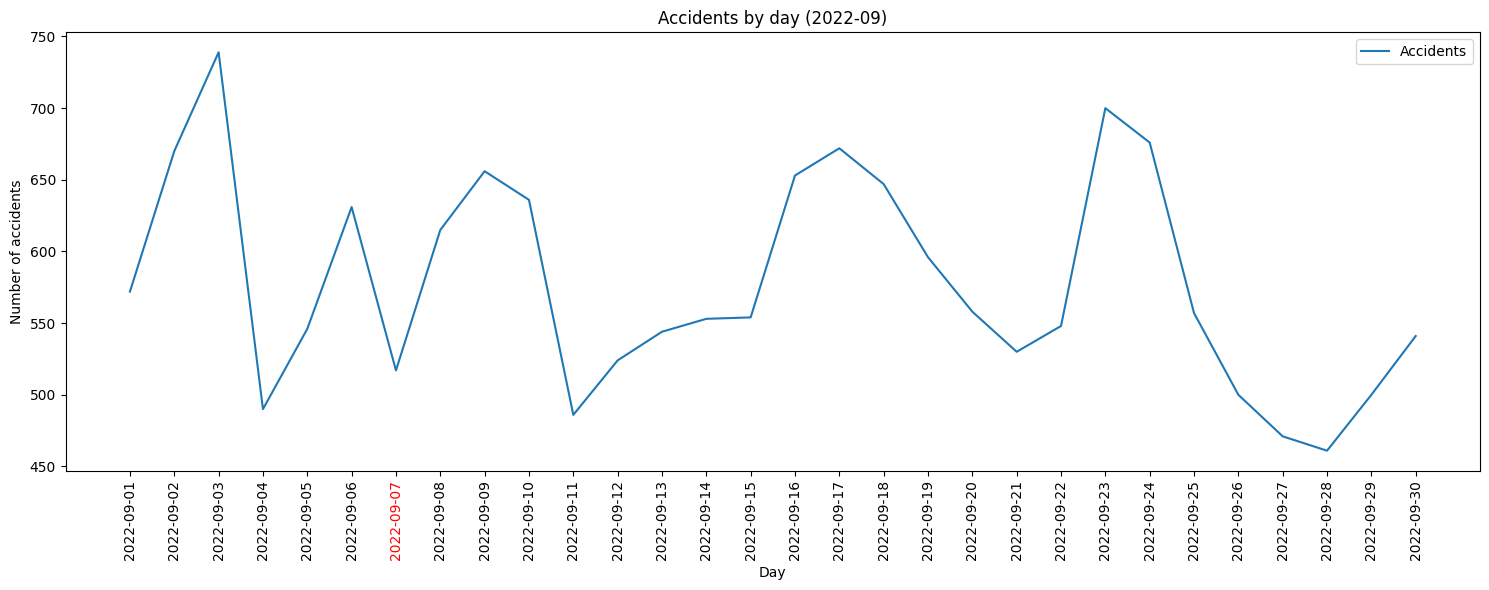

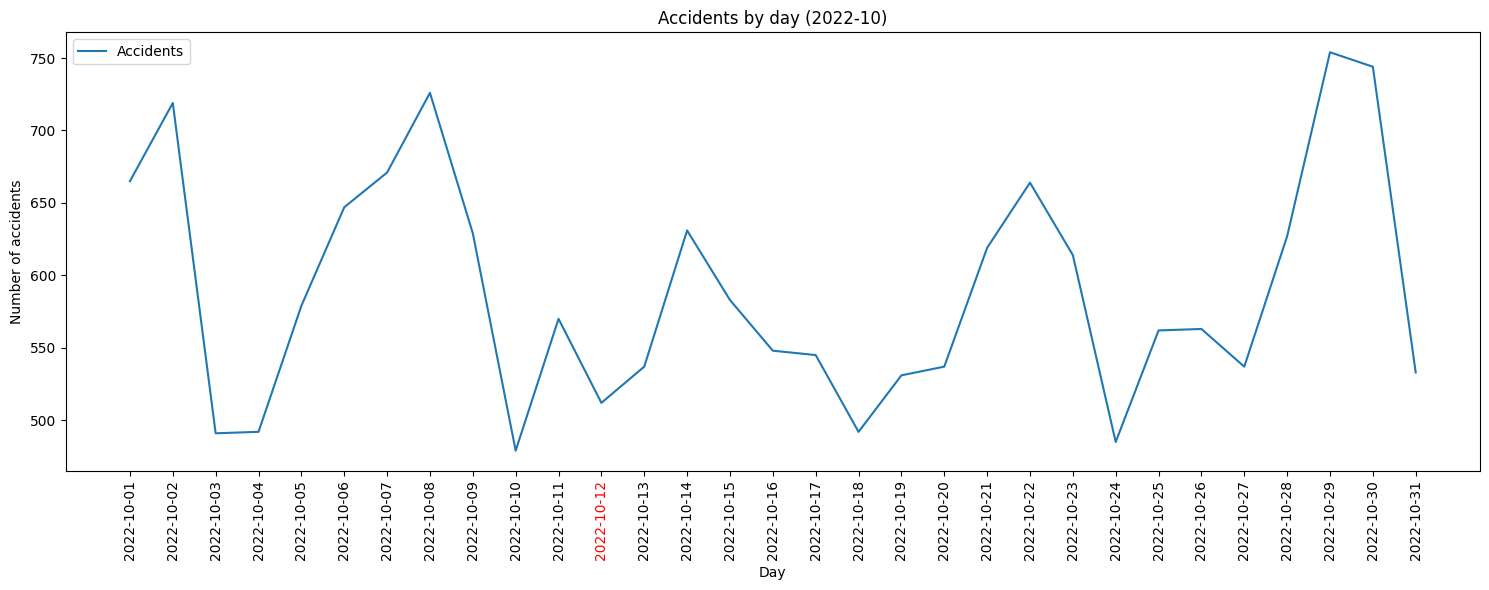

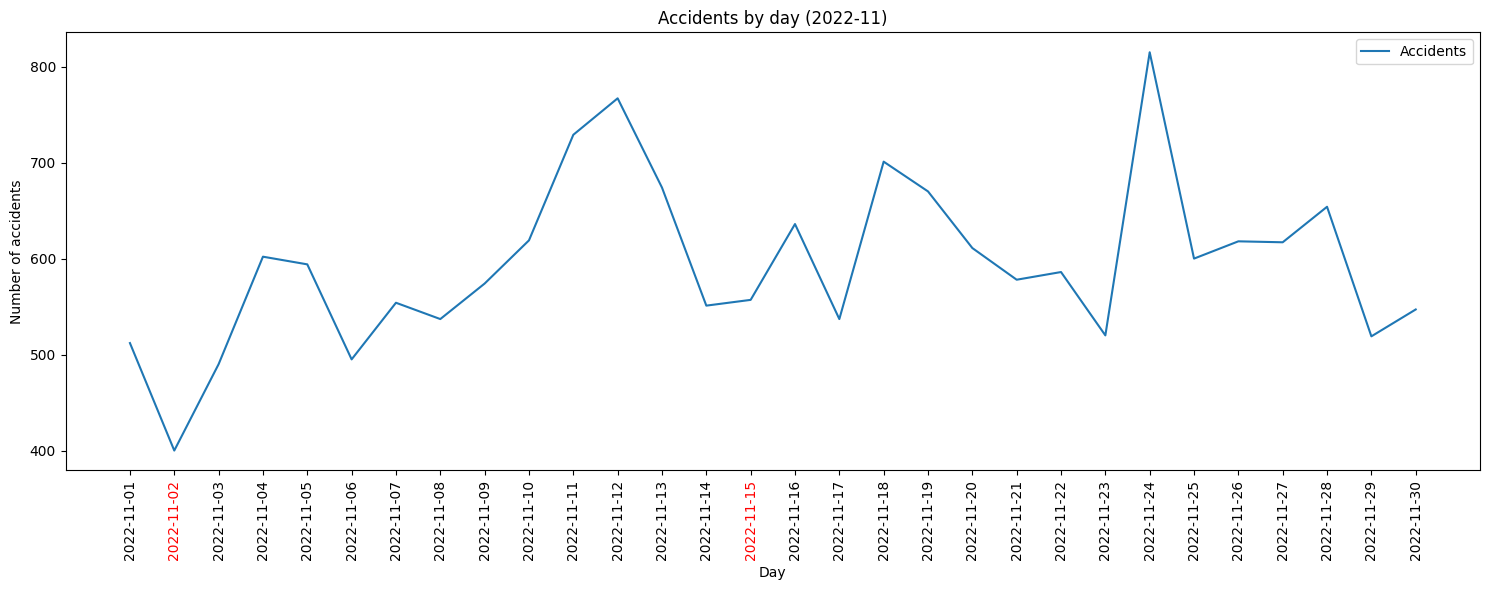

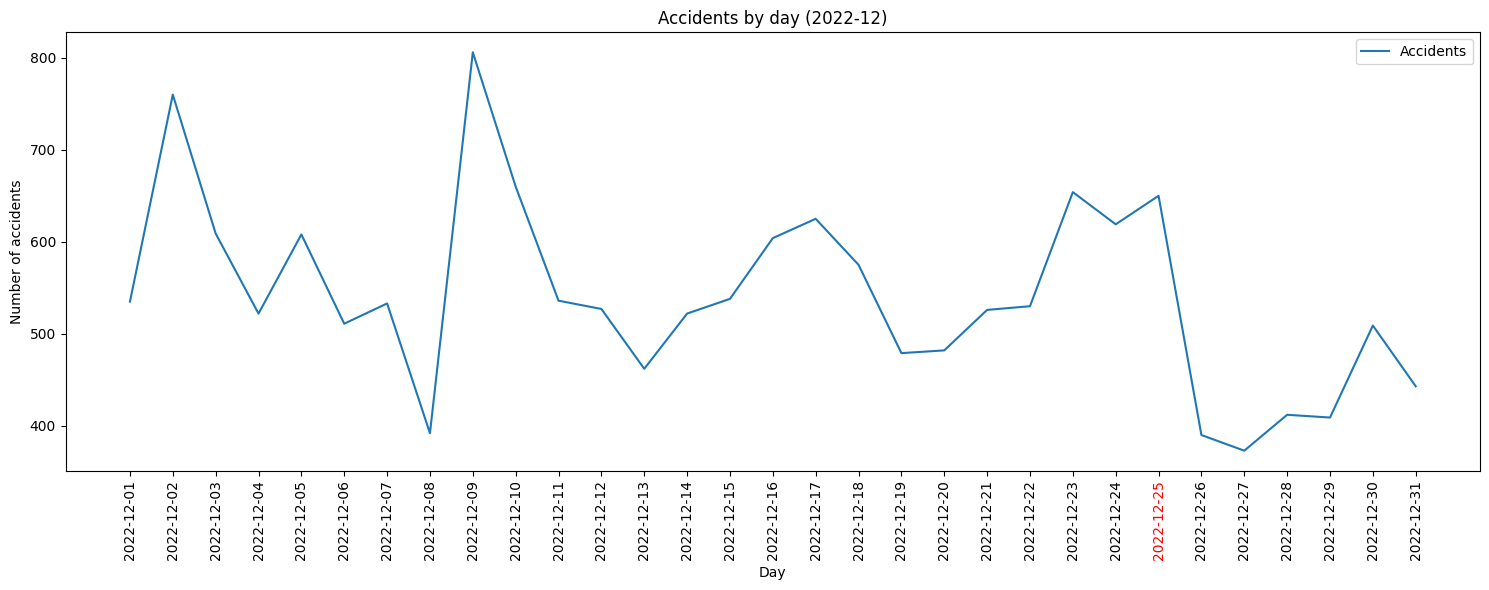

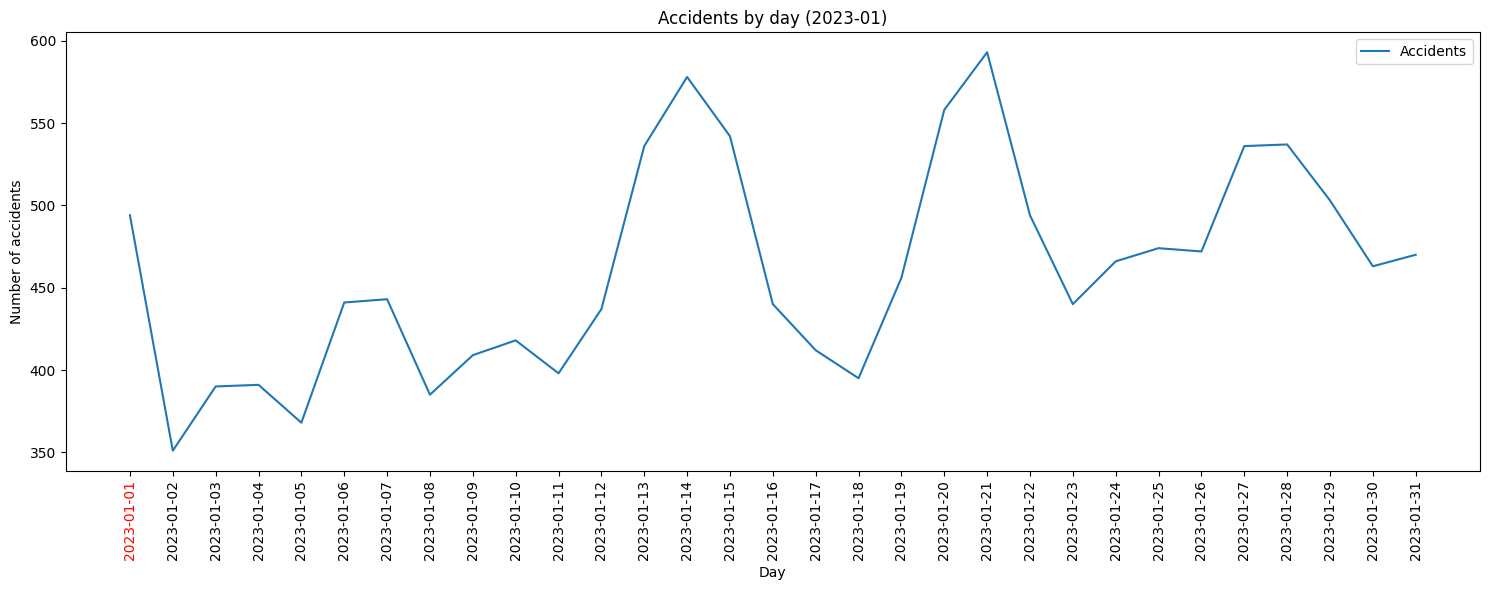

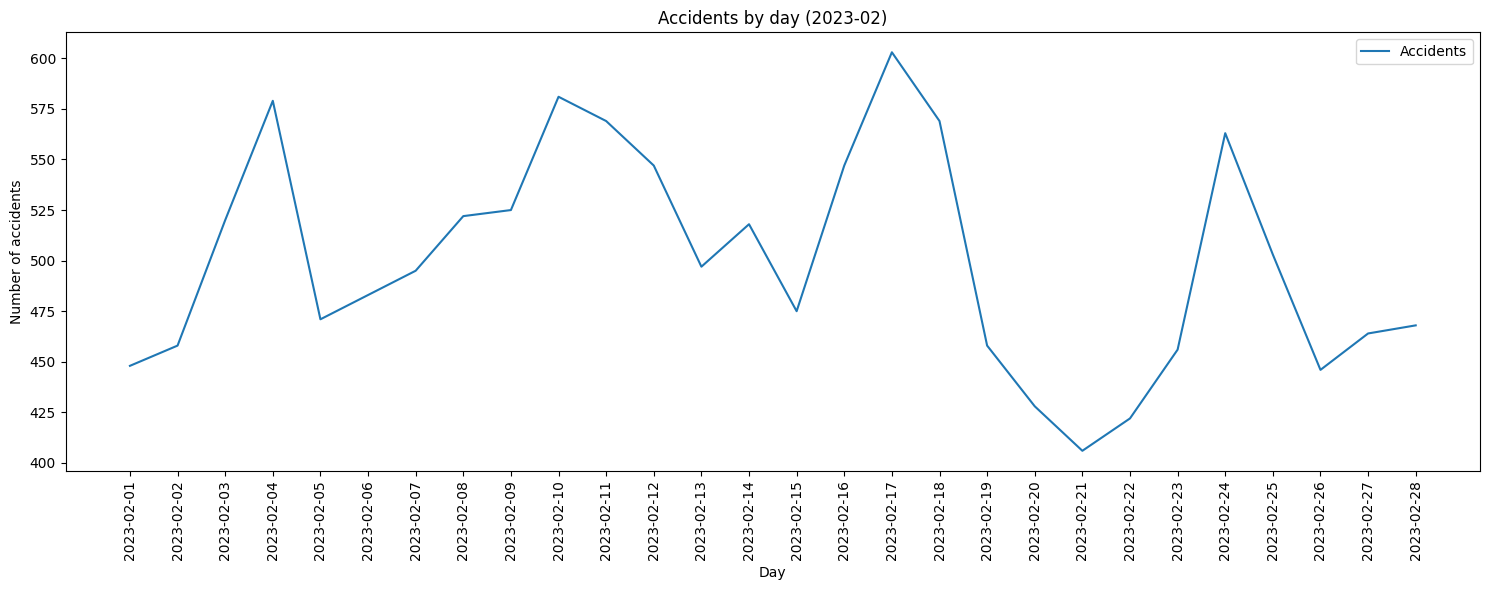

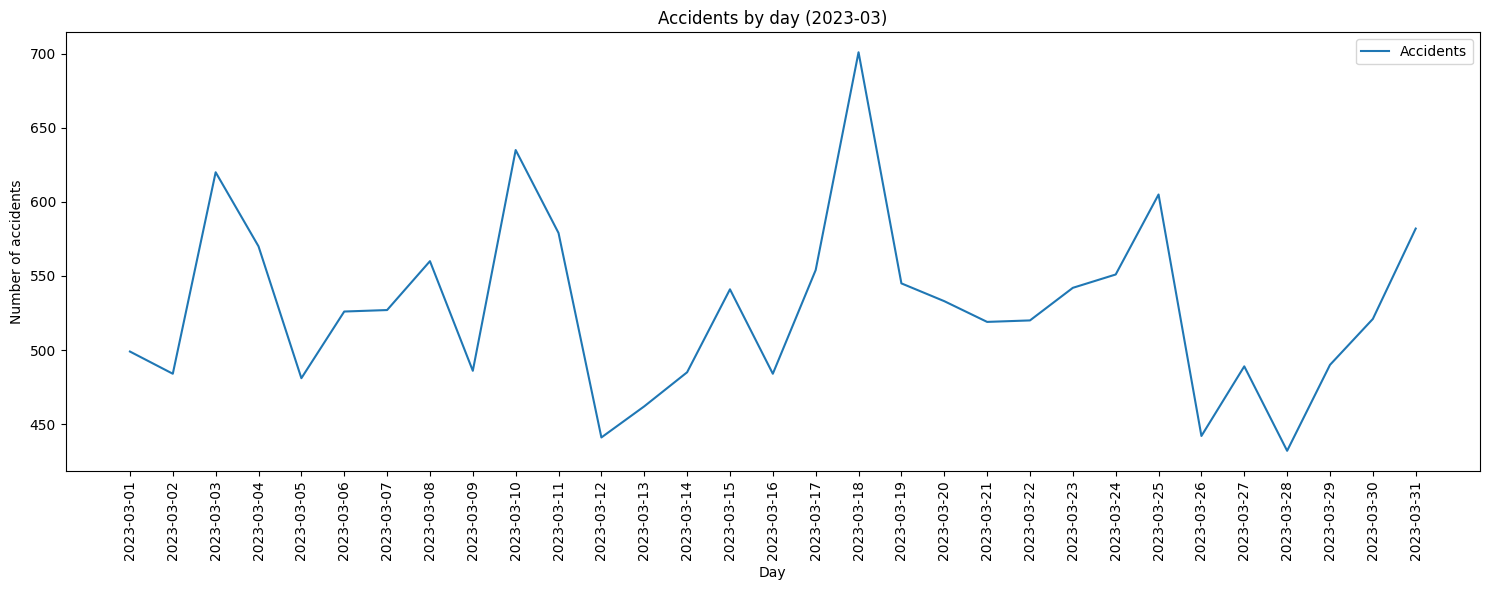

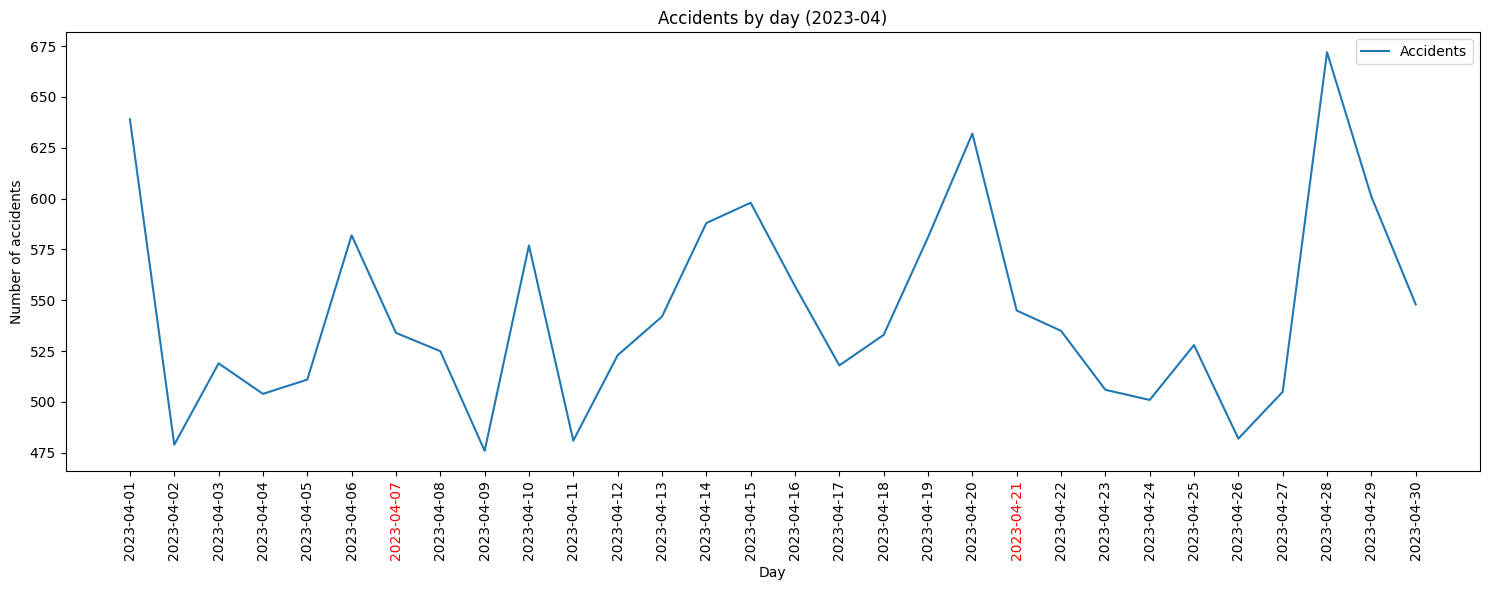

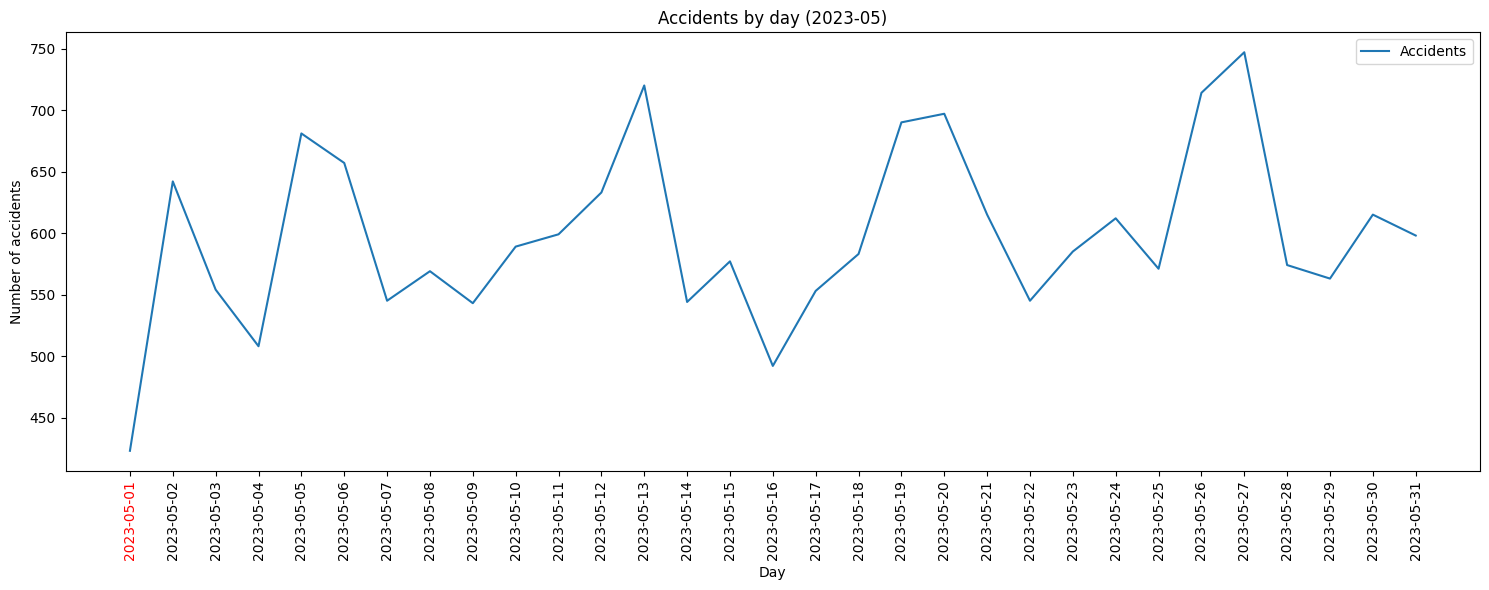

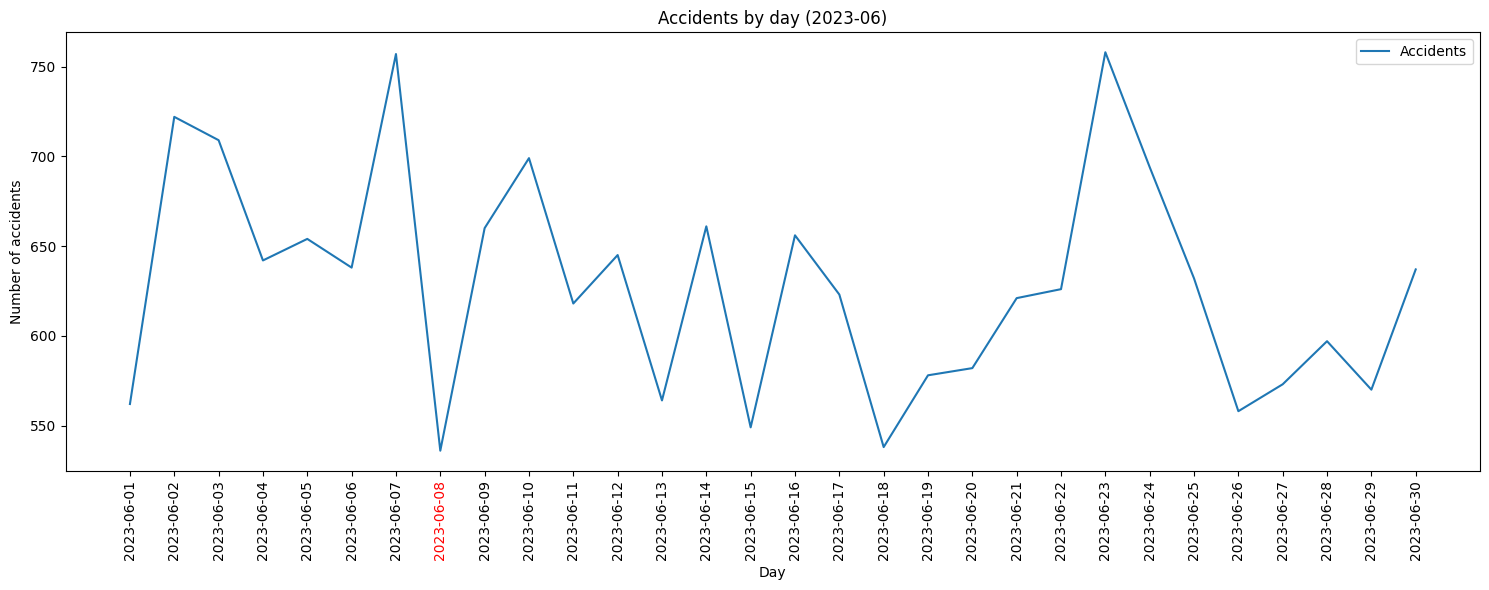

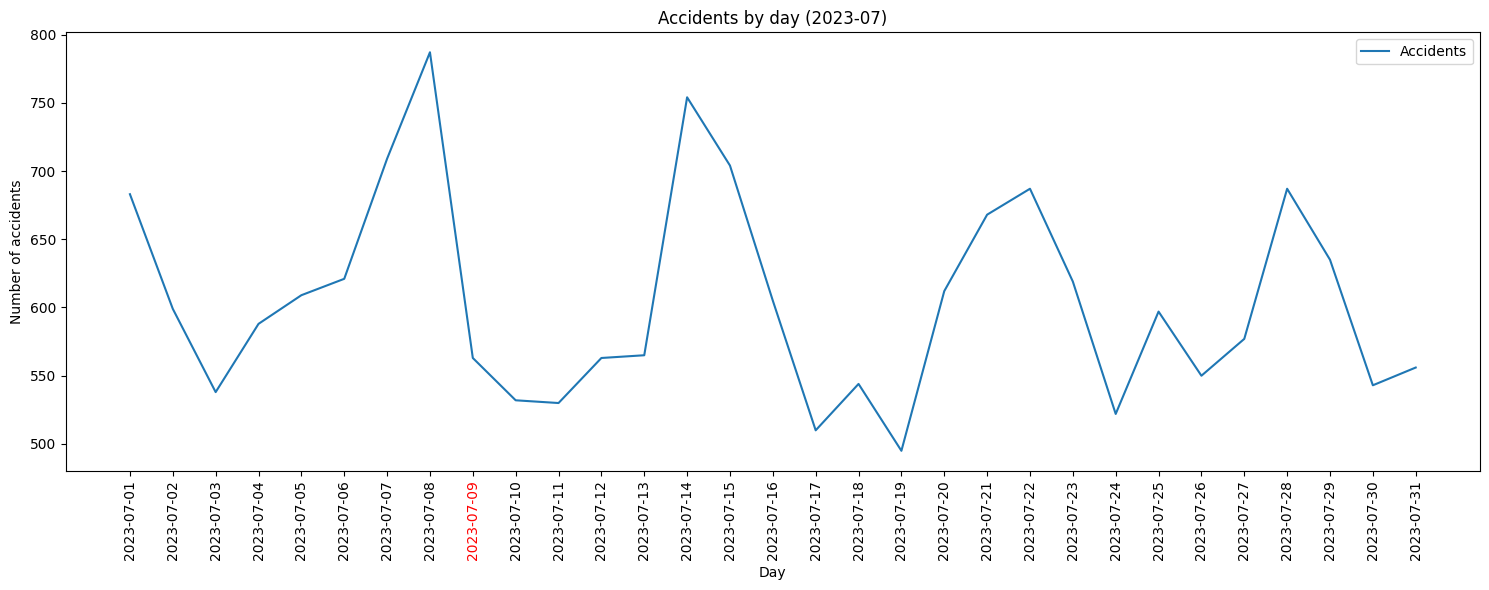

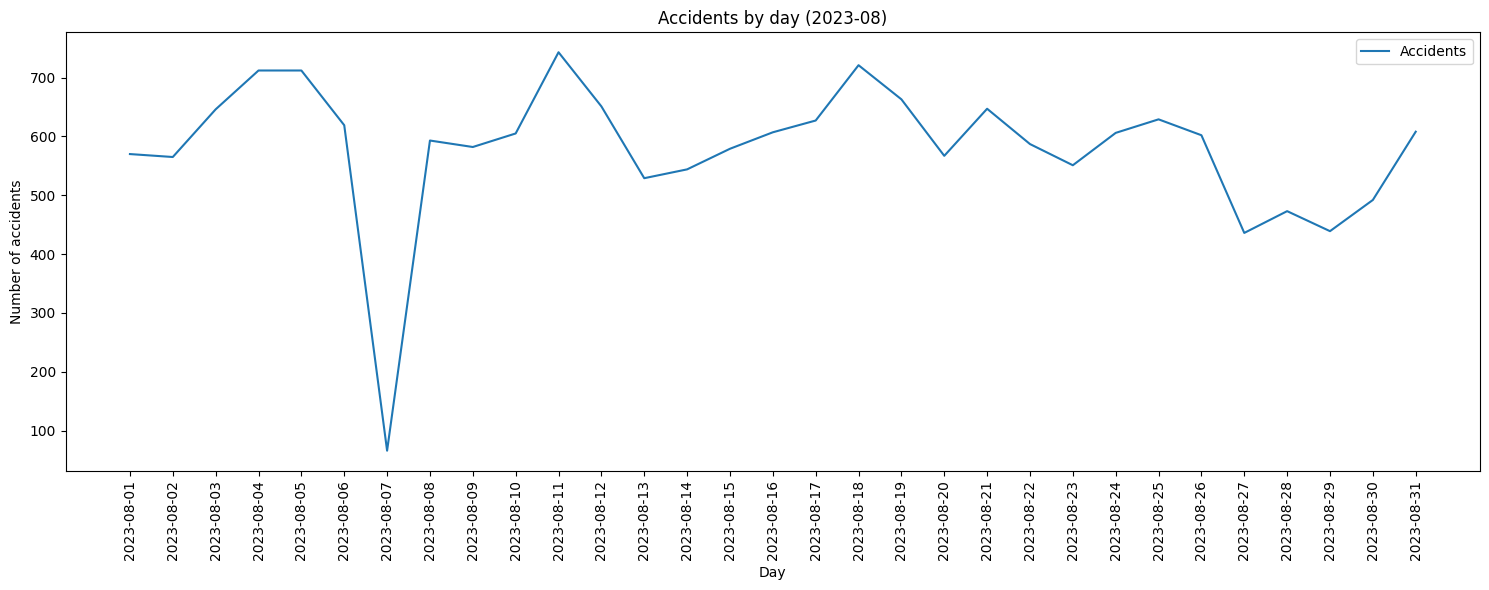

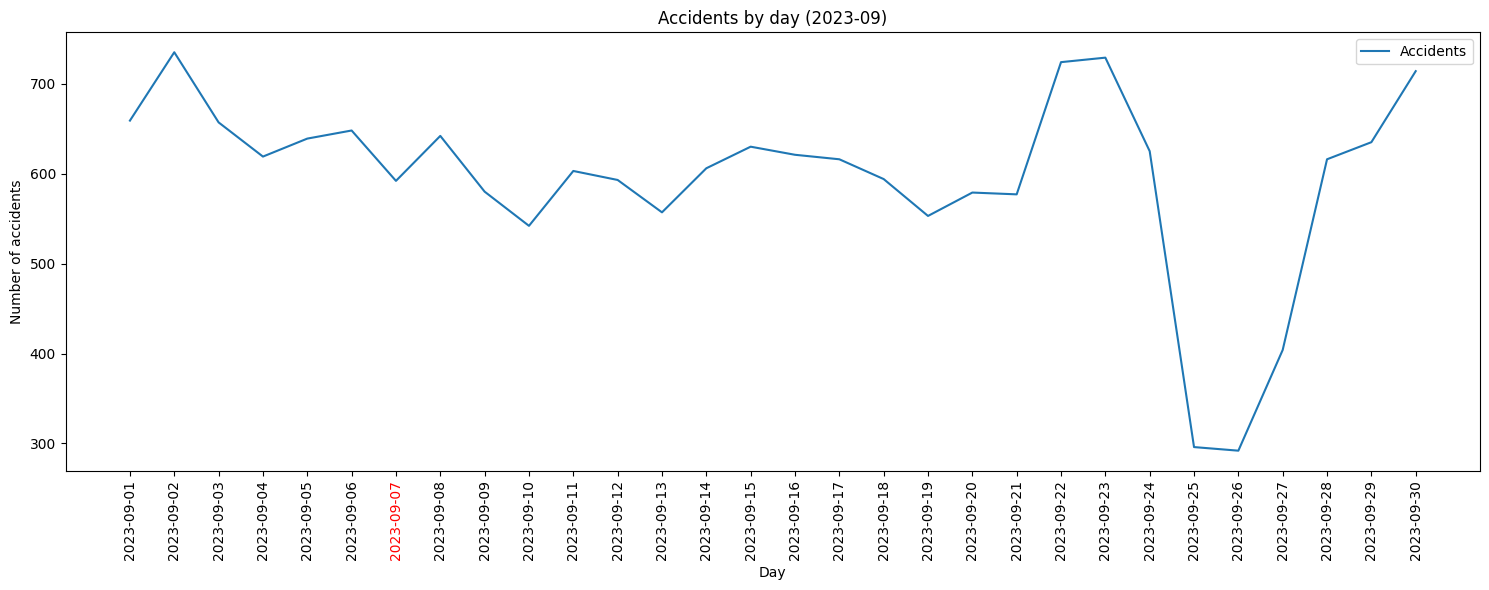

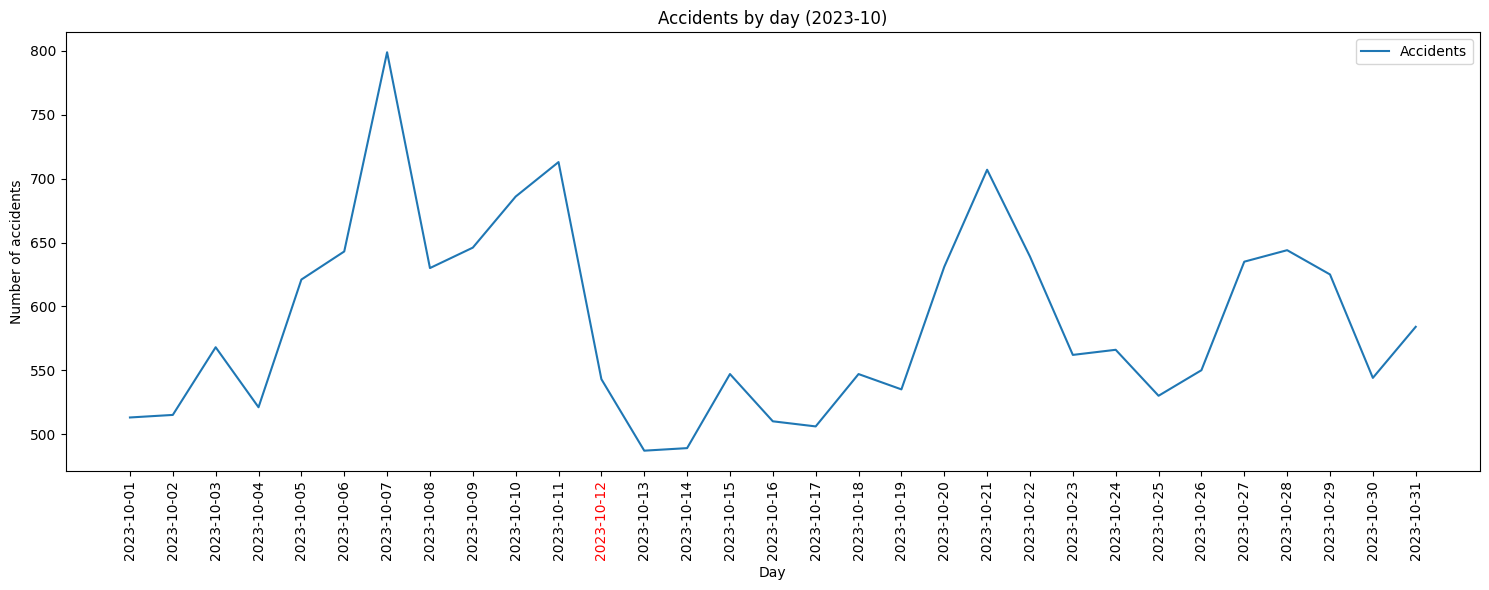

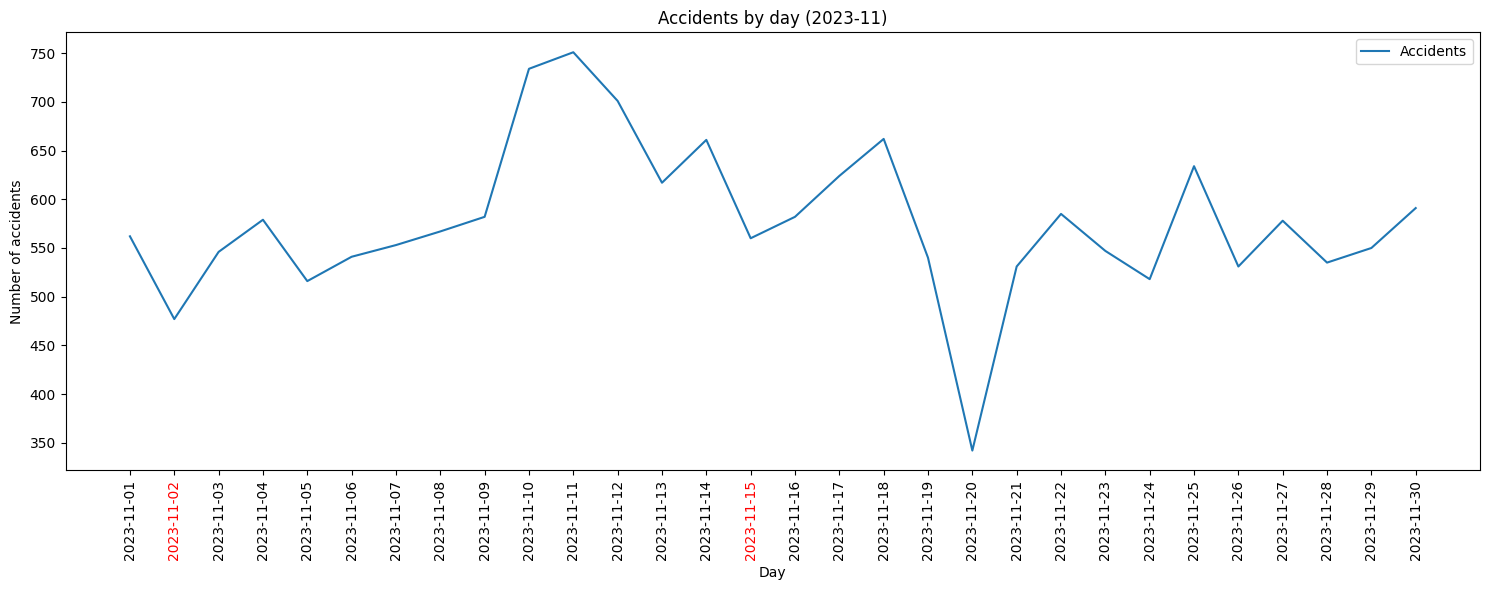

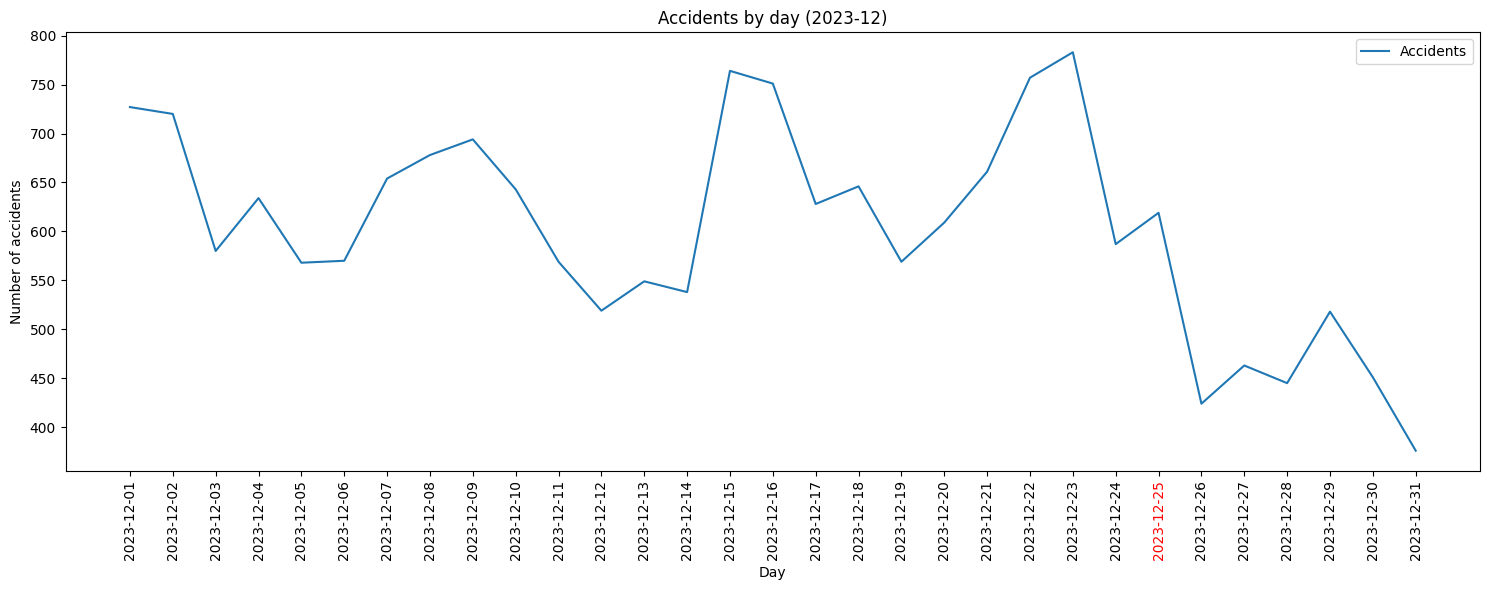

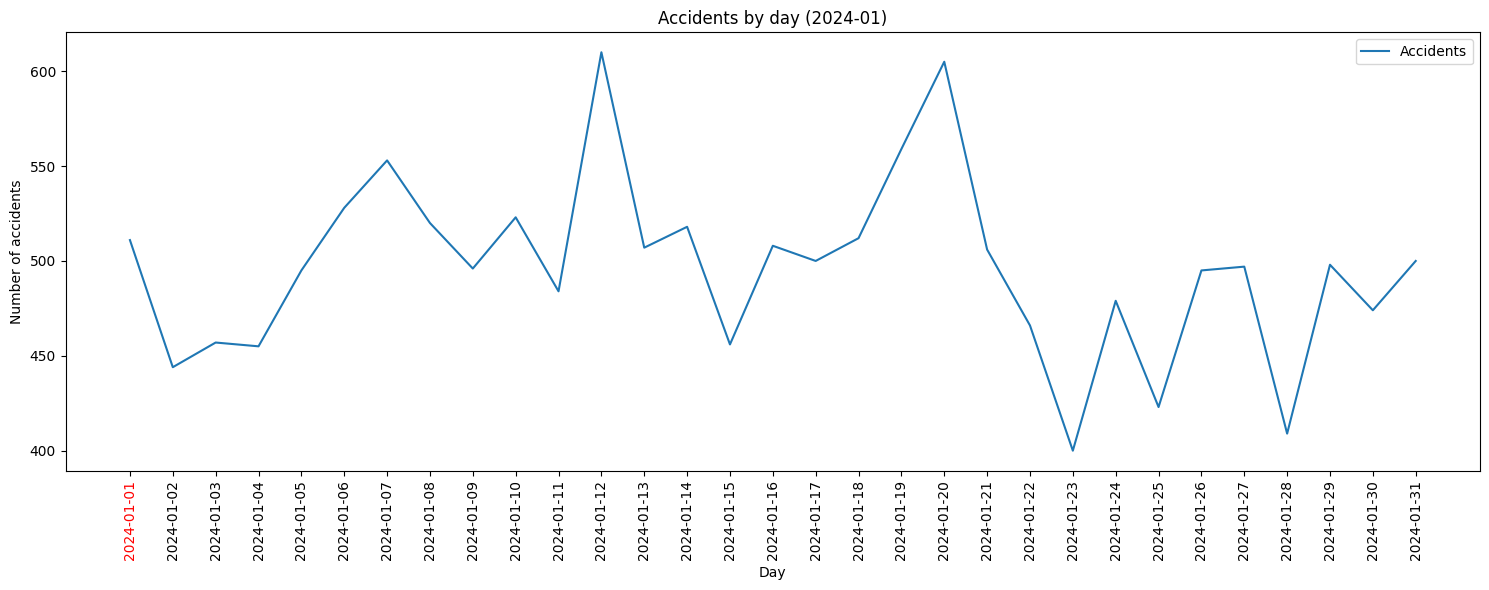

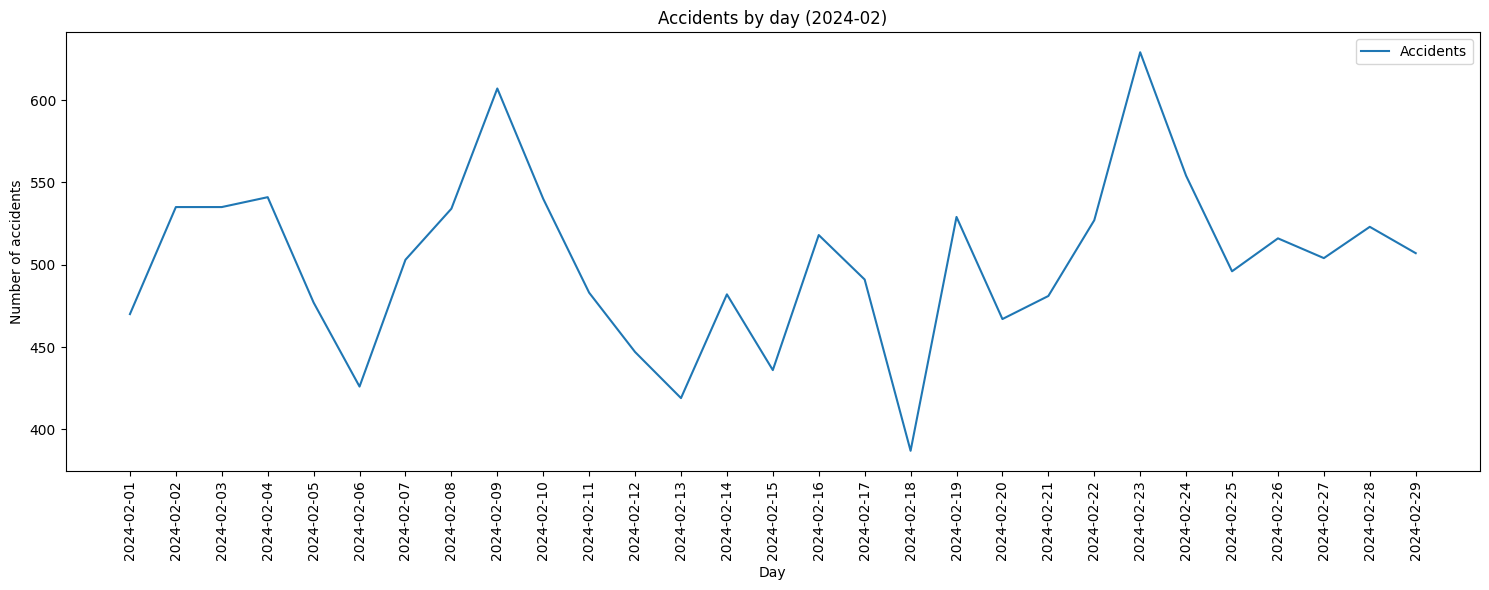

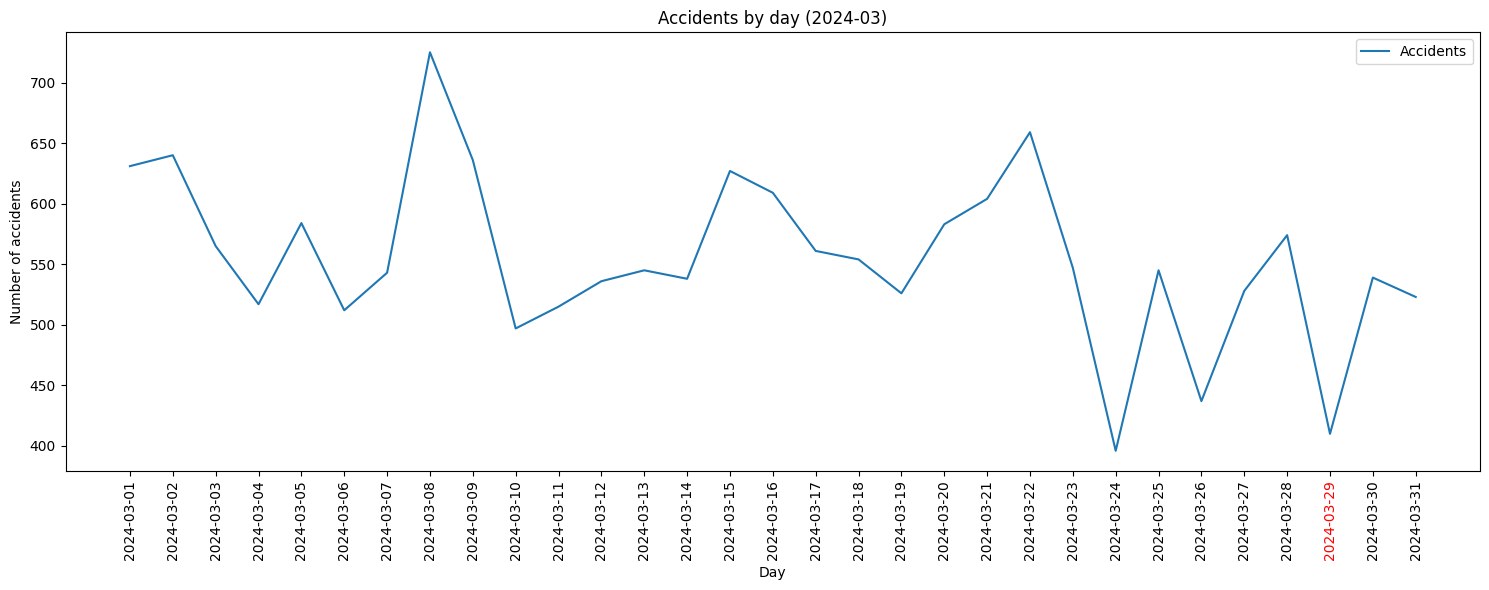

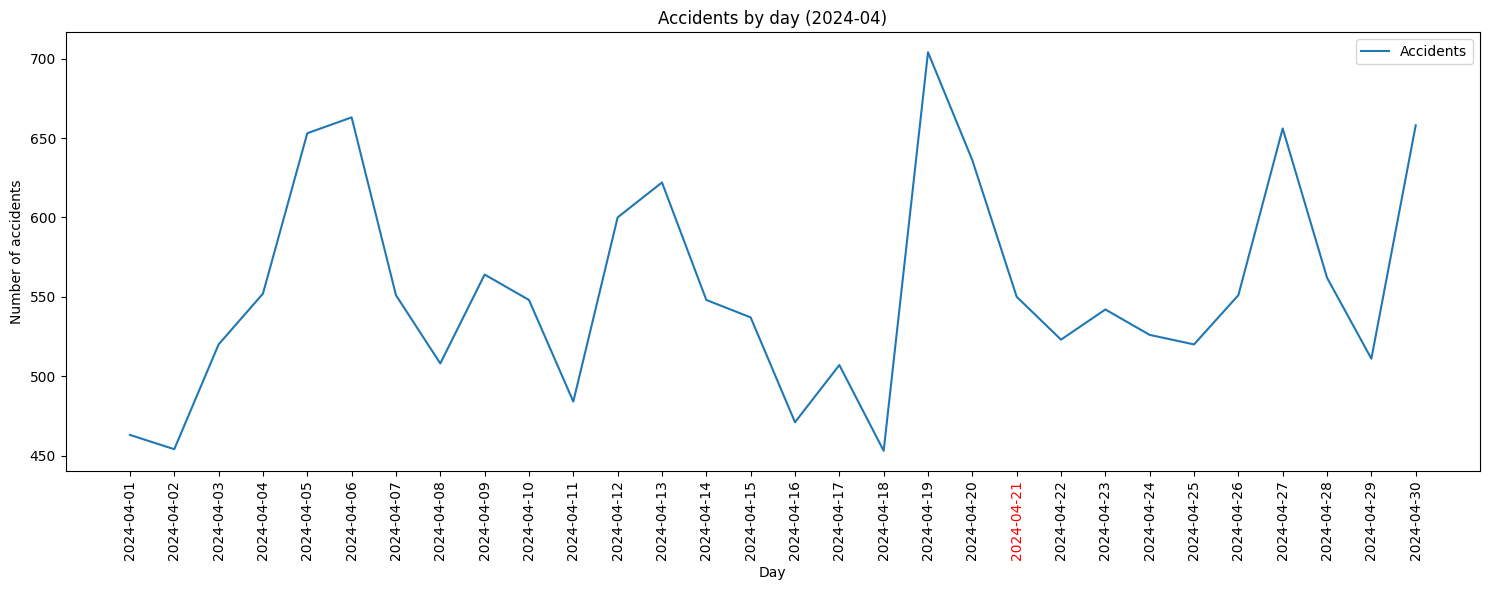

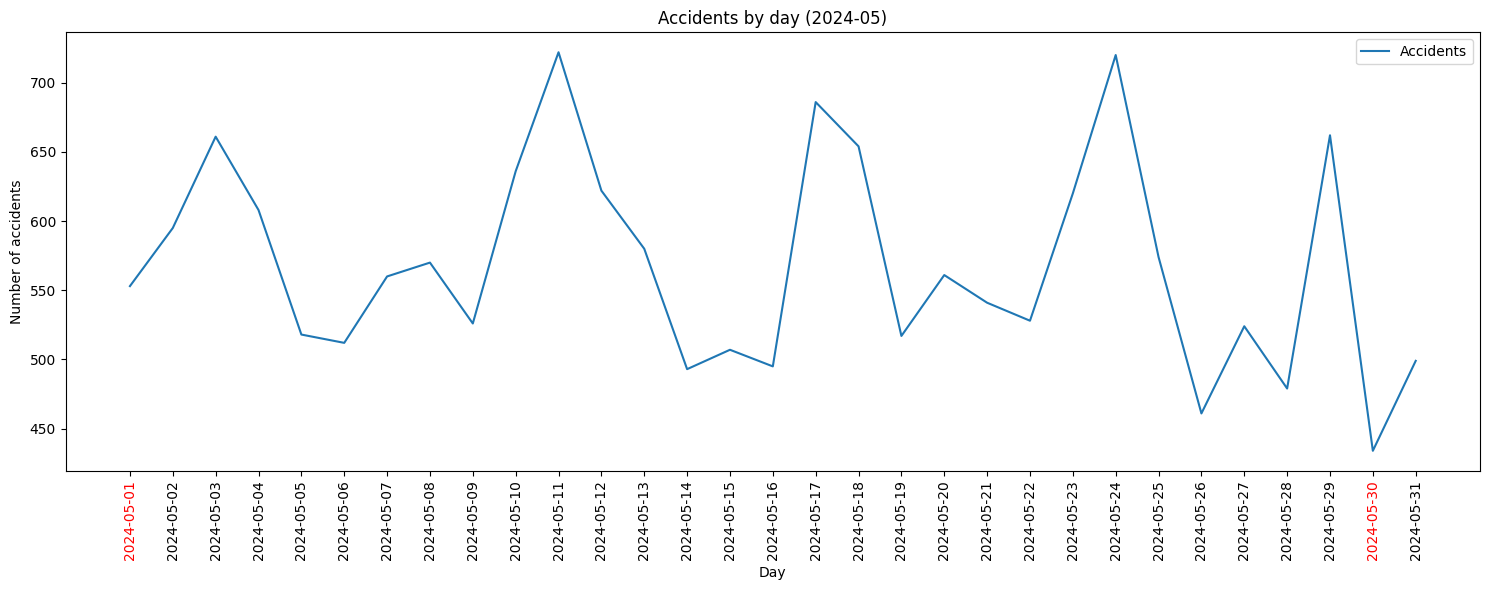

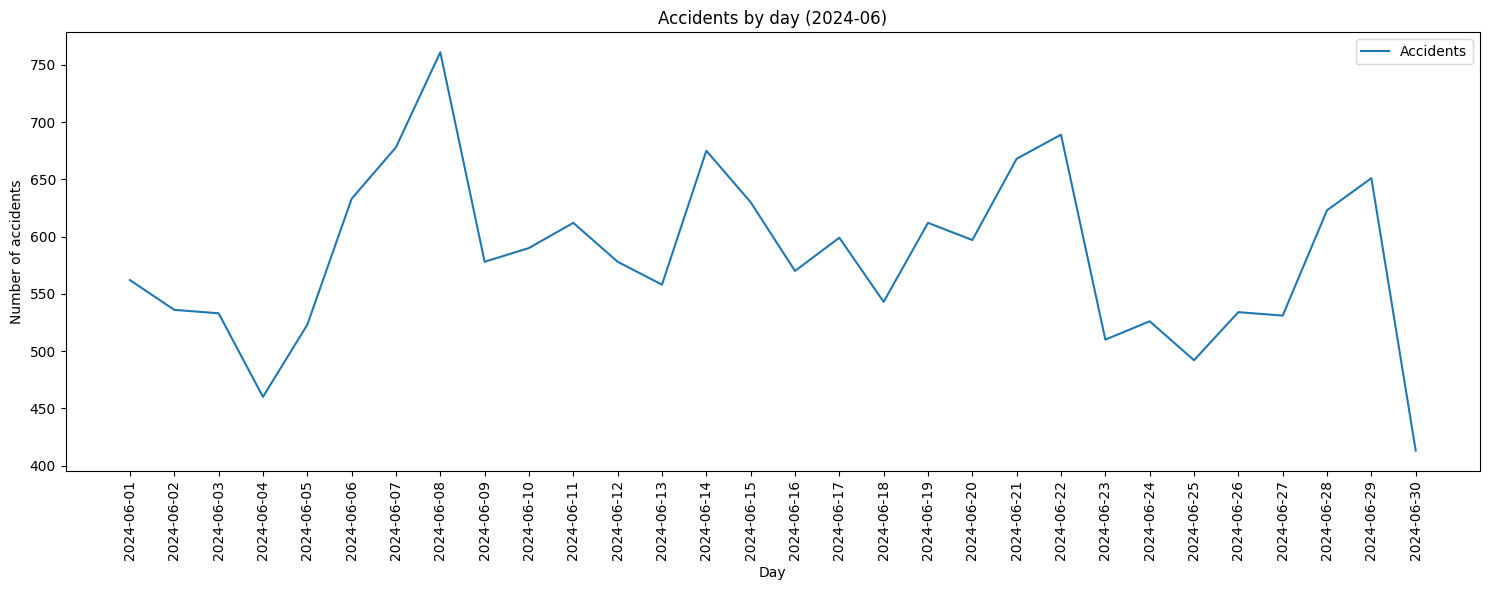

In [ ]:
accidentsByDay = pandas.read_csv(accidentsByDay_path, dtype=col_types, encoding='utf-8')
holidays = pandas.read_csv(holidays_path, dtype=col_types, encoding='utf-8')

initial_value = 0
currentPosition = 0
days_list = accidentsByDay['date'].tolist()
number_accidents_list = accidentsByDay['number_accidents'].tolist()
holidays_list = holidays['data'].tolist()

while currentPosition < len(days_list) - 1:
    initial_value = currentPosition

    # Avançar até o final do mês atual
    while currentPosition + 1 < len(days_list) and days_list[currentPosition][5:7] == days_list[currentPosition + 1][5:7]:
        currentPosition += 1

    # Garantir que o intervalo inclui o último dia do mês
    currentPosition += 1

    fig, ax = plt.subplots(figsize=(15, 6), facecolor="w")

    # Plotar os dados de acidentes para o mês atual
    ax.plot(days_list[initial_value:currentPosition], number_accidents_list[initial_value:currentPosition], label="Accidents")

    # Rotacionar os rótulos do eixo X
    ax.set_xticks(range(currentPosition - initial_value))
    ax.set_xticklabels(days_list[initial_value:currentPosition], rotation=90)

    # Atualizar cores dos rótulos para feriados
    for tick in ax.get_xticklabels():
        if tick.get_text() in holidays_list:
            tick.set_color('red')  # Marcar feriados em vermelho

    ax.set_xlabel('Day')
    ax.set_ylabel('Number of accidents')
    ax.set_title(f'Accidents by day ({days_list[initial_value][:7]})')  # Título com o mês/ano
    ax.legend()
    plt.tight_layout()
    plt.show()